In [1]:
pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import pmdarima as pm
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = r"/content/Updated_Meesho_Data_with_Further_Modified_ESM.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data.fillna(method='ffill', inplace=True)
print("Missing Values After Handling:\n", data.isnull().sum())

Missing Values:
 SKU_1_Units_Sold      0
SKU_1_Revenue_INR     0
SKU_2_Units_Sold      0
SKU_2_Revenue_INR     0
SKU_3_Units_Sold      0
SKU_3_Revenue_INR     0
SKU_4_Units_Sold      0
SKU_4_Revenue_INR     0
SKU_5_Units_Sold      0
SKU_5_Revenue_INR     0
SKU_6_Units_Sold      0
SKU_6_Revenue_INR     0
SKU_7_Units_Sold      0
SKU_7_Revenue_INR     0
SKU_8_Units_Sold      0
SKU_8_Revenue_INR     0
SKU_9_Units_Sold      0
SKU_9_Revenue_INR     0
SKU_10_Units_Sold     0
SKU_10_Revenue_INR    0
ESM                   0
dtype: int64
Missing Values After Handling:
 SKU_1_Units_Sold      0
SKU_1_Revenue_INR     0
SKU_2_Units_Sold      0
SKU_2_Revenue_INR     0
SKU_3_Units_Sold      0
SKU_3_Revenue_INR     0
SKU_4_Units_Sold      0
SKU_4_Revenue_INR     0
SKU_5_Units_Sold      0
SKU_5_Revenue_INR     0
SKU_6_Units_Sold      0
SKU_6_Revenue_INR     0
SKU_7_Units_Sold      0
SKU_7_Revenue_INR     0
SKU_8_Units_Sold      0
SKU_8_Revenue_INR     0
SKU_9_Units_Sold      0
SKU_9_Revenue_INR     0
SK

<ipython-input-5-5e44b0e339d7>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


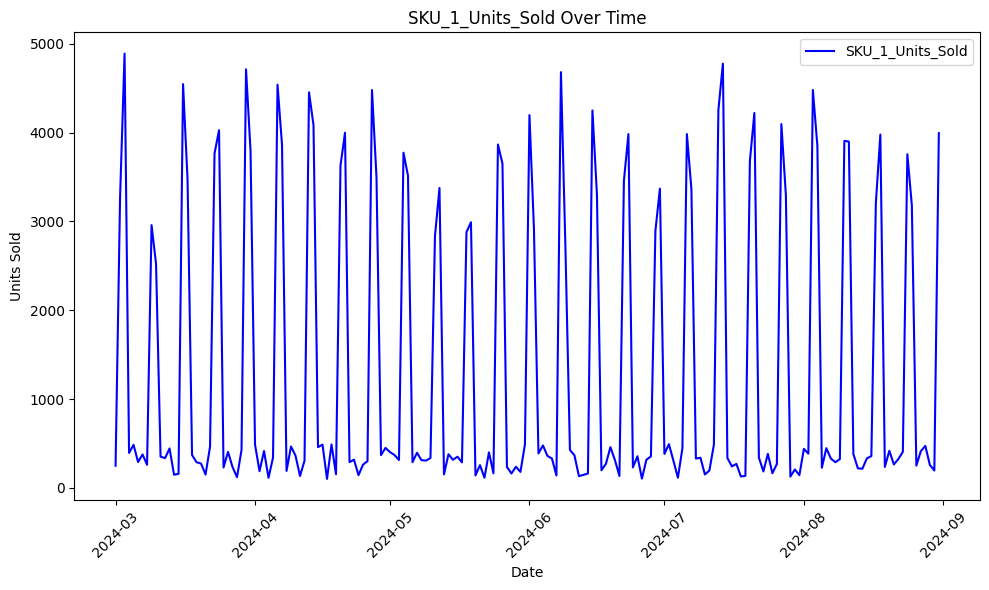

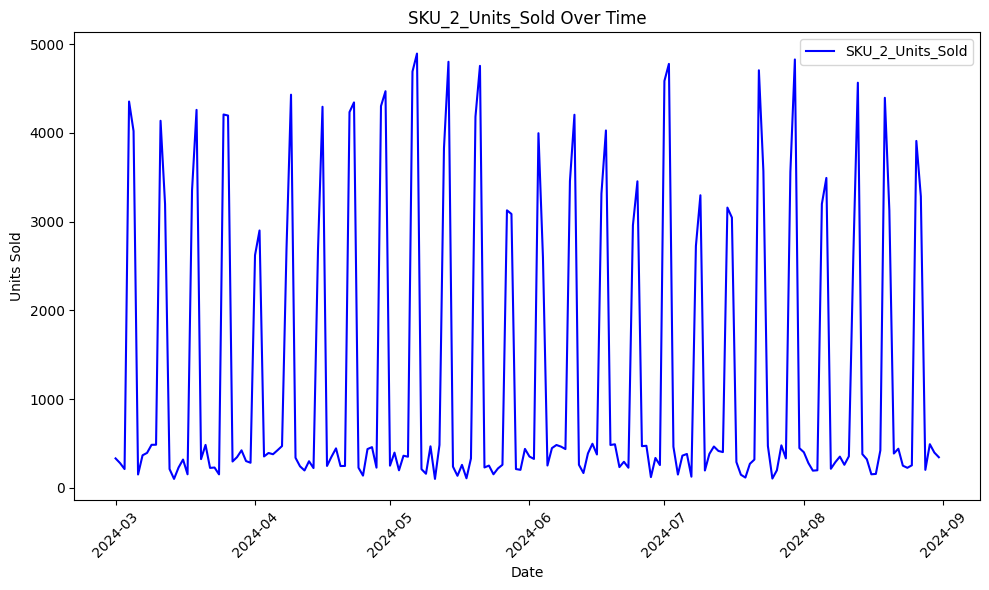

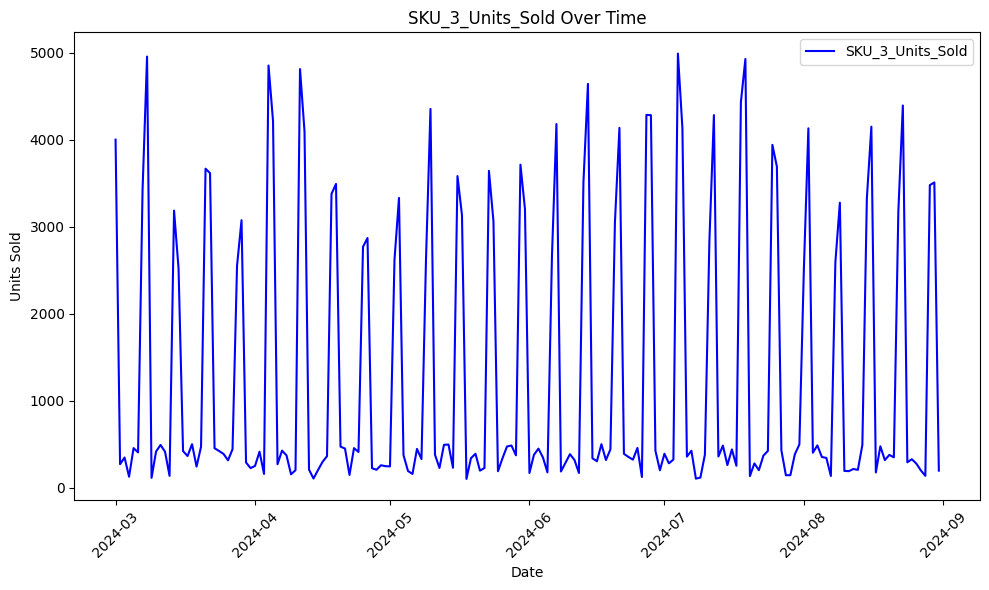

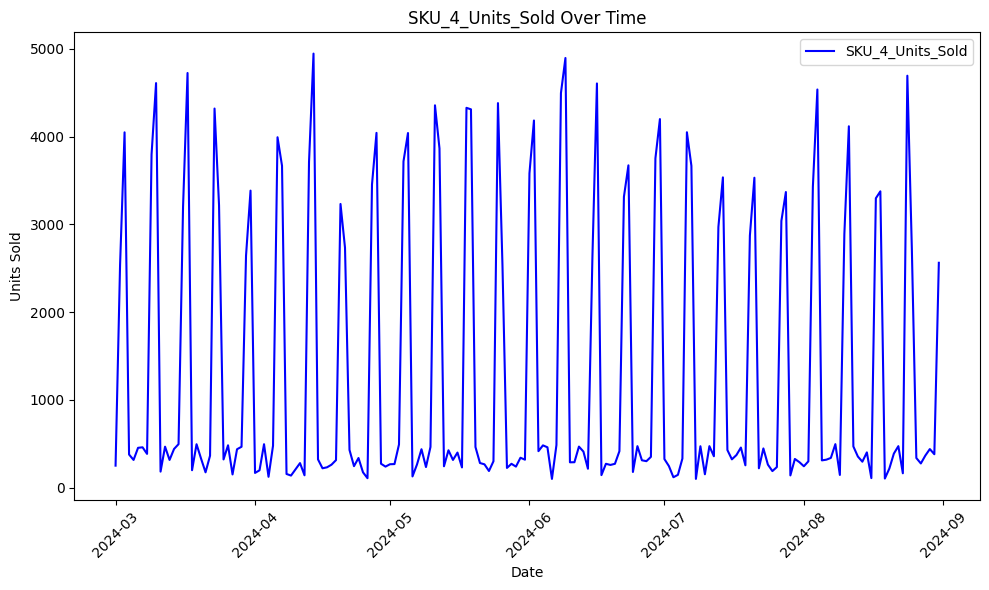

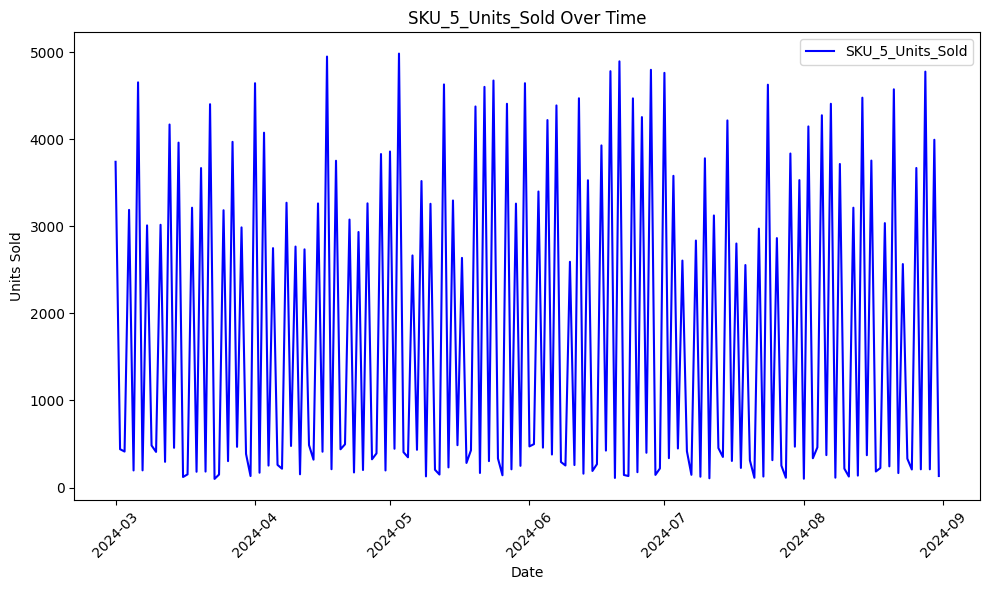

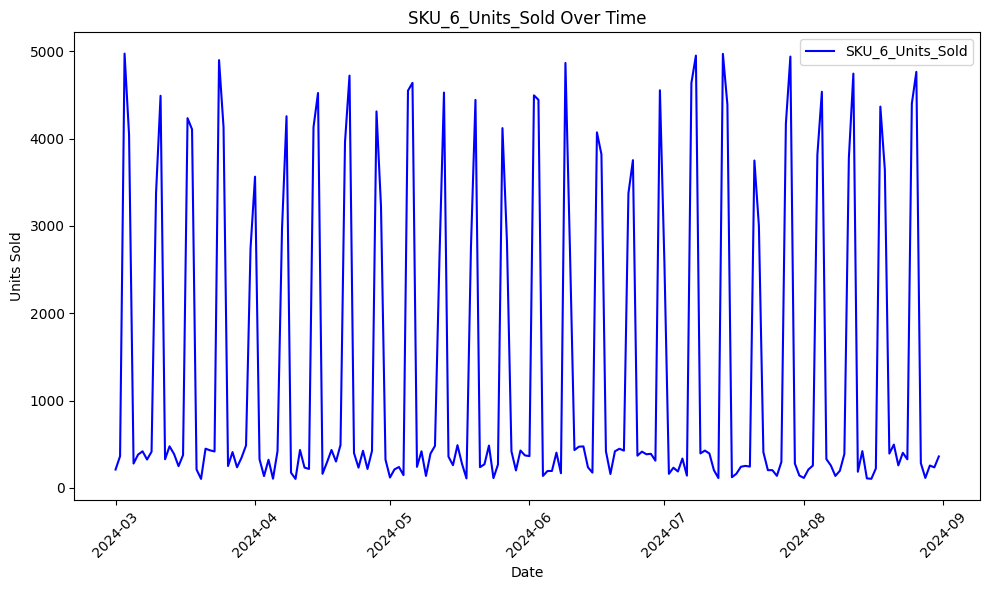

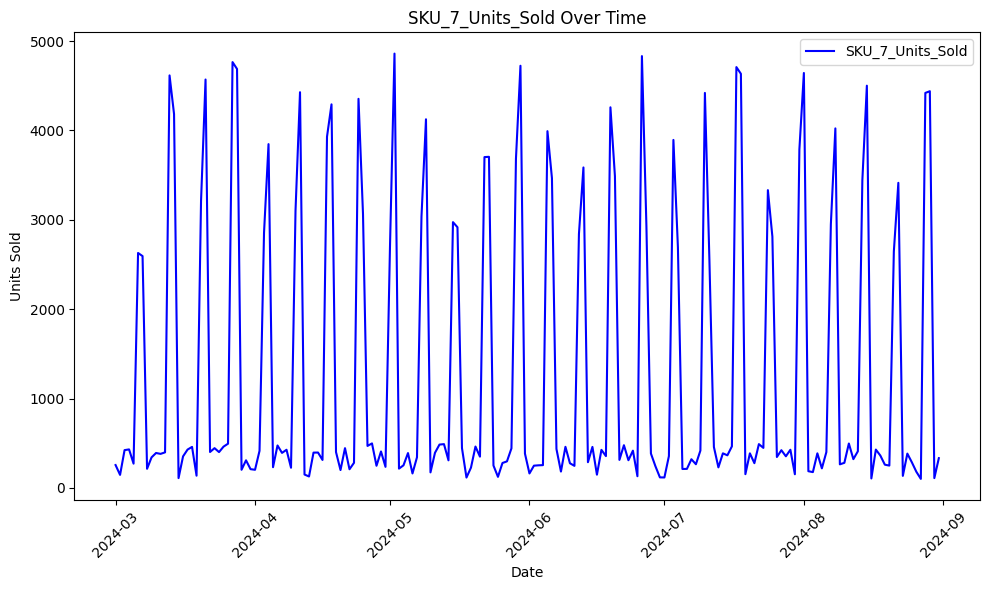

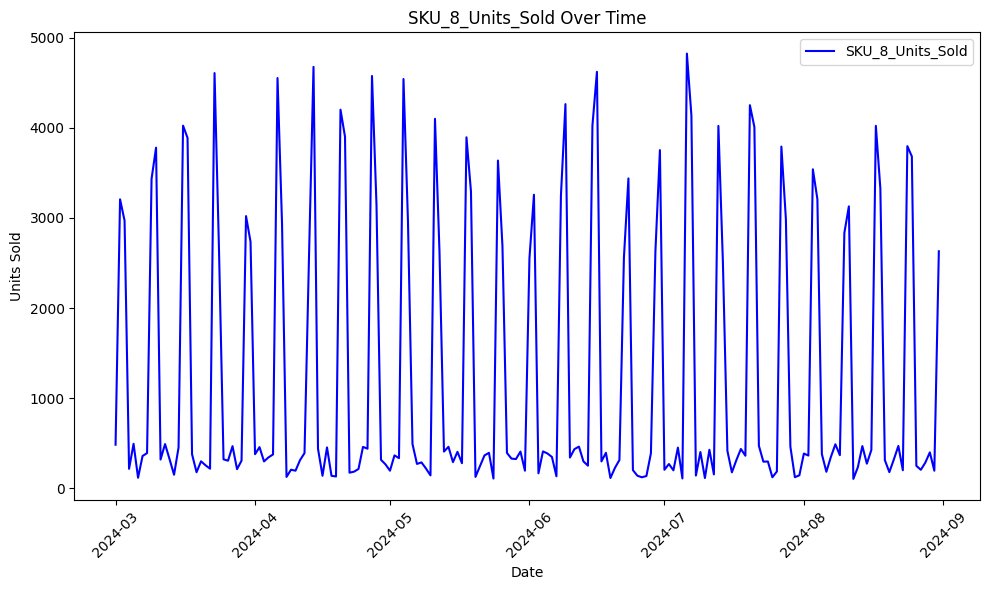

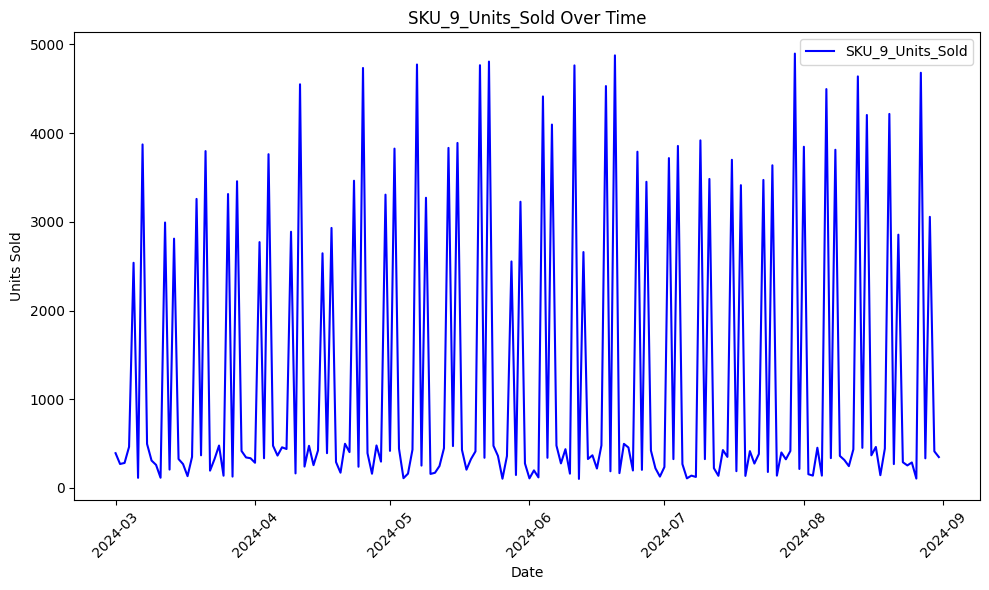

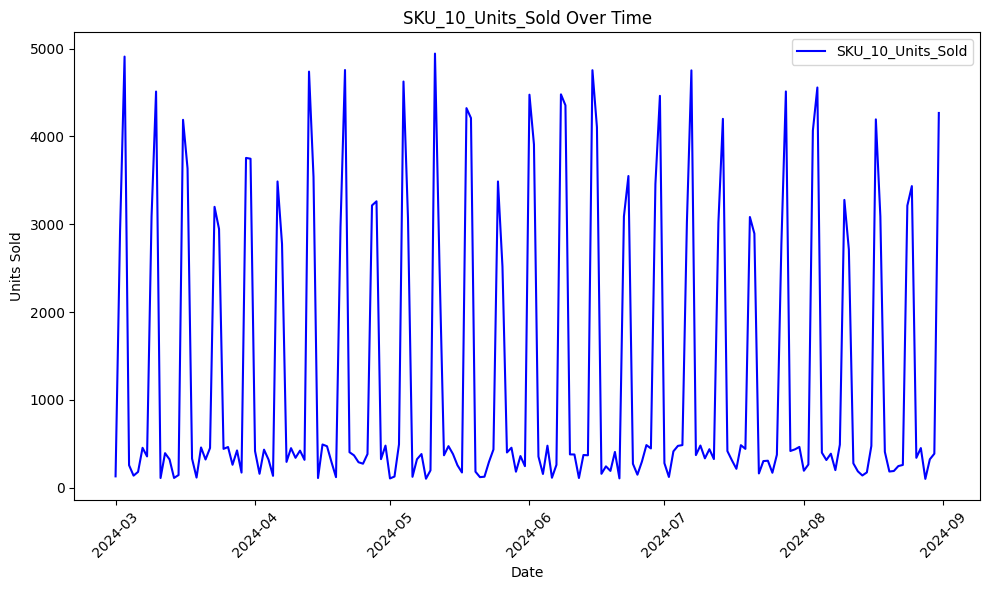

In [6]:
sku_columns = [col for col in data.columns if 'Units_Sold' in col]

for sku in sku_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[sku], label=sku, color='blue')
    plt.title(f'{sku} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


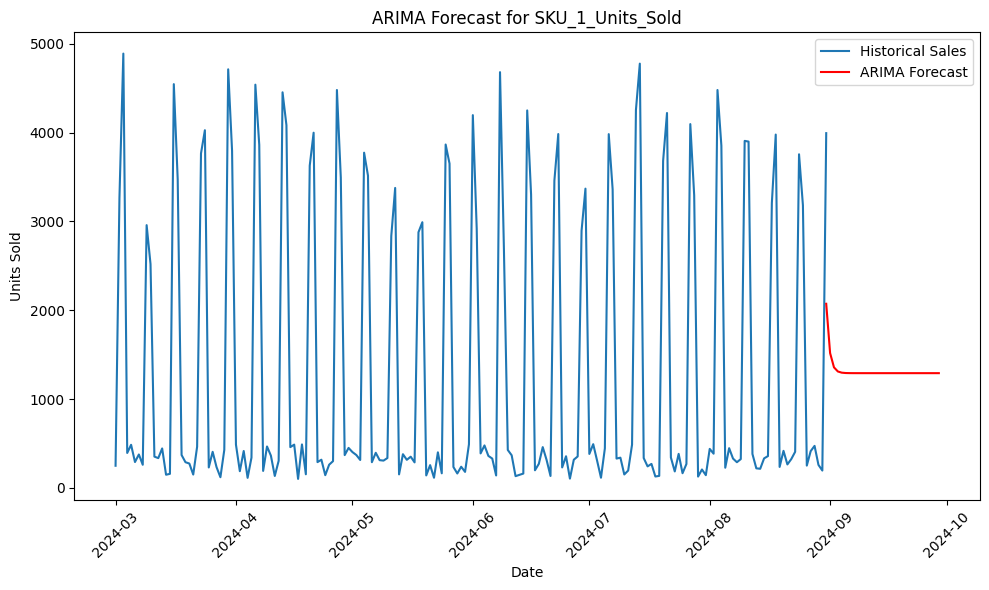

ARIMA Forecast for SKU_1_Units_Sold:
 2024-09-01    2073.422813
2024-09-02    1517.866699
2024-09-03    1357.247288
2024-09-04    1310.809863
2024-09-05    1297.384123
2024-09-06    1293.502545
2024-09-07    1292.380324
2024-09-08    1292.055873
2024-09-09    1291.962070
2024-09-10    1291.934950
2024-09-11    1291.927109
2024-09-12    1291.924842
2024-09-13    1291.924187
2024-09-14    1291.923998
2024-09-15    1291.923943
2024-09-16    1291.923927
2024-09-17    1291.923922
2024-09-18    1291.923921
2024-09-19    1291.923921
2024-09-20    1291.923921
2024-09-21    1291.923921
2024-09-22    1291.923921
2024-09-23    1291.923921
2024-09-24    1291.923921
2024-09-25    1291.923921
2024-09-26    1291.923921
2024-09-27    1291.923921
2024-09-28    1291.923921
2024-09-29    1291.923921
2024-09-30    1291.923921
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


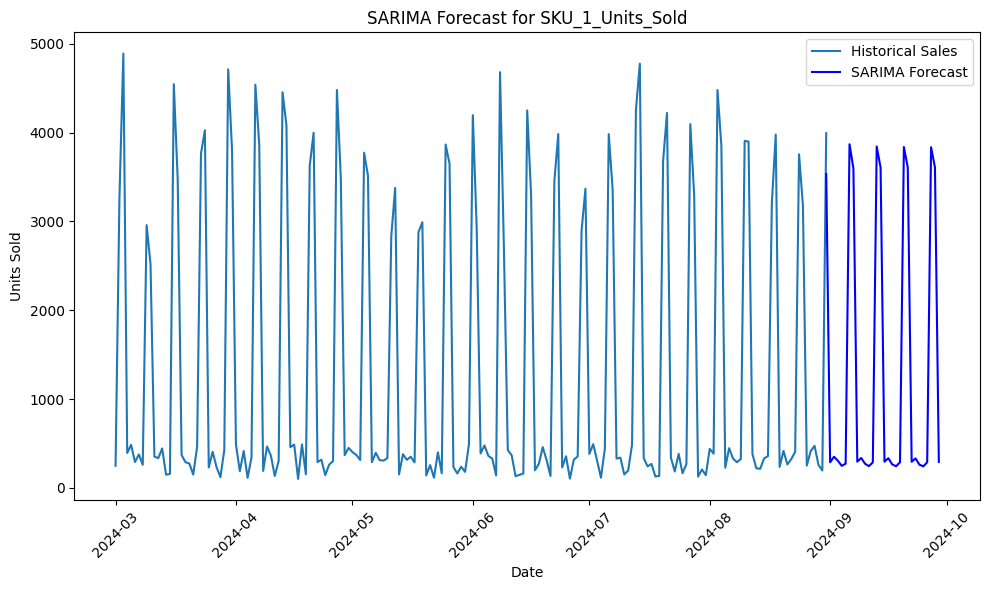

SARIMA Forecast for SKU_1_Units_Sold:
 2024-09-01    3535.492229
2024-09-02     288.523013
2024-09-03     350.389670
2024-09-04     305.536336
2024-09-05     247.986223
2024-09-06     272.572493
2024-09-07    3870.091351
2024-09-08    3597.205691
2024-09-09     294.697606
2024-09-10     336.963553
2024-09-11     271.747389
2024-09-12     244.886830
2024-09-13     286.850194
2024-09-14    3844.650353
2024-09-15    3608.372486
2024-09-16     294.969896
2024-09-17     333.390968
2024-09-18     264.180431
2024-09-19     243.339934
2024-09-20     288.711990
2024-09-21    3838.720928
2024-09-22    3609.624046
2024-09-23     294.084391
2024-09-24     331.751252
2024-09-25     261.757179
2024-09-26     242.097578
2024-09-27     288.138282
2024-09-28    3836.618895
2024-09-29    3608.930634
2024-09-30     292.971772
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


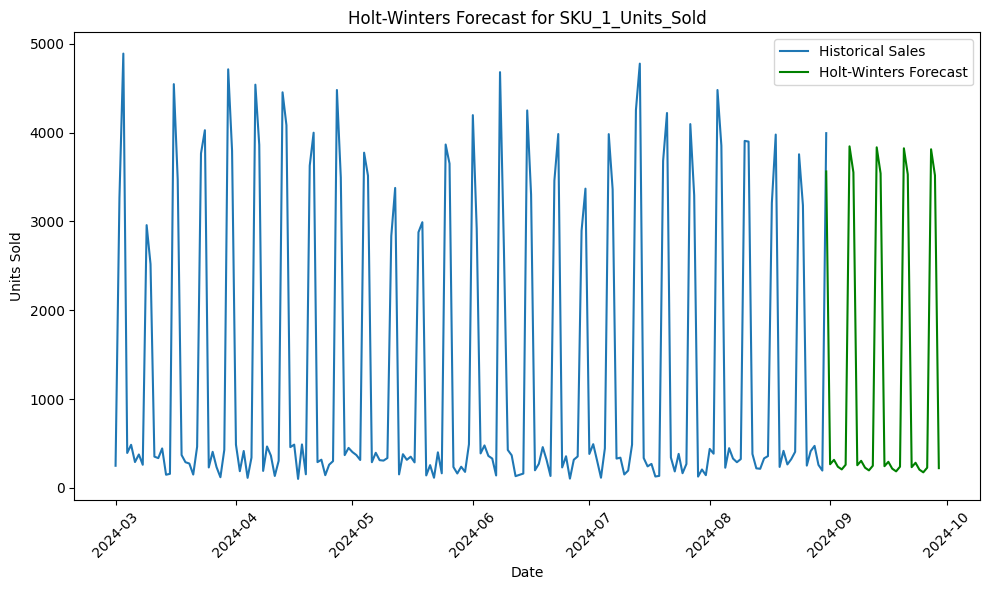

Holt-Winters Forecast for SKU_1_Units_Sold:
 2024-09-01    3563.615684
2024-09-02     266.051944
2024-09-03     315.462555
2024-09-04     238.123590
2024-09-05     207.910415
2024-09-06     260.265741
2024-09-07    3846.352247
2024-09-08    3552.626898
2024-09-09     255.063157
2024-09-10     304.473768
2024-09-11     227.134803
2024-09-12     196.921629
2024-09-13     249.276955
2024-09-14    3835.363461
2024-09-15    3541.638111
2024-09-16     244.074371
2024-09-17     293.484982
2024-09-18     216.146017
2024-09-19     185.932842
2024-09-20     238.288168
2024-09-21    3824.374675
2024-09-22    3530.649325
2024-09-23     233.085585
2024-09-24     282.496196
2024-09-25     205.157231
2024-09-26     174.944056
2024-09-27     227.299382
2024-09-28    3813.385888
2024-09-29    3519.660539
2024-09-30     222.096798
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


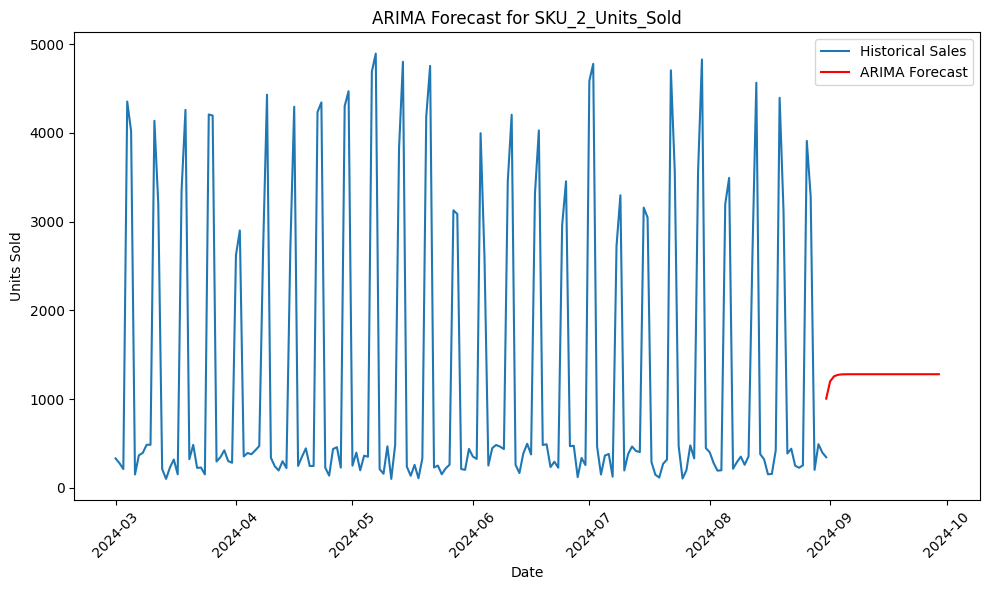

ARIMA Forecast for SKU_2_Units_Sold:
 2024-09-01    1005.207352
2024-09-02    1199.521689
2024-09-03    1256.712906
2024-09-04    1273.545607
2024-09-05    1278.499862
2024-09-06    1279.958014
2024-09-07    1280.387182
2024-09-08    1280.513496
2024-09-09    1280.550673
2024-09-10    1280.561615
2024-09-11    1280.564836
2024-09-12    1280.565784
2024-09-13    1280.566063
2024-09-14    1280.566145
2024-09-15    1280.566169
2024-09-16    1280.566176
2024-09-17    1280.566178
2024-09-18    1280.566179
2024-09-19    1280.566179
2024-09-20    1280.566179
2024-09-21    1280.566179
2024-09-22    1280.566179
2024-09-23    1280.566179
2024-09-24    1280.566179
2024-09-25    1280.566179
2024-09-26    1280.566179
2024-09-27    1280.566179
2024-09-28    1280.566179
2024-09-29    1280.566179
2024-09-30    1280.566179
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


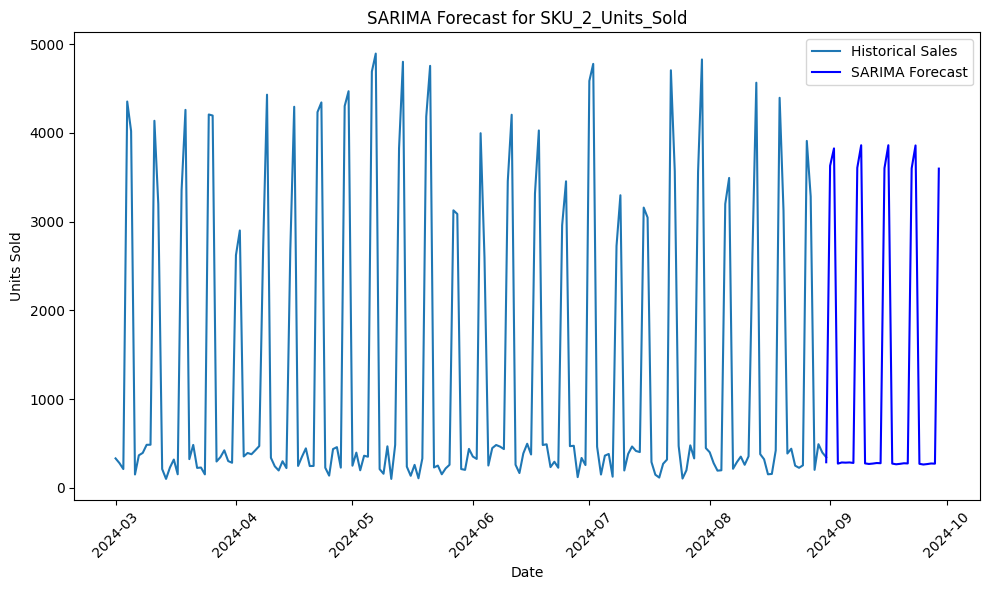

SARIMA Forecast for SKU_2_Units_Sold:
 2024-09-01     288.435633
2024-09-02    3629.227046
2024-09-03    3824.637937
2024-09-04     273.114717
2024-09-05     286.160315
2024-09-06     284.103985
2024-09-07     286.430937
2024-09-08     280.731679
2024-09-09    3606.185106
2024-09-10    3860.323901
2024-09-11     275.689983
2024-09-12     269.270520
2024-09-13     273.705046
2024-09-14     279.937171
2024-09-15     277.828015
2024-09-16    3602.198882
2024-09-17    3860.482718
2024-09-18     273.511833
2024-09-19     265.718517
2024-09-20     270.611171
2024-09-21     277.118925
2024-09-22     275.263159
2024-09-23    3599.557619
2024-09-24    3858.134014
2024-09-25     270.998185
2024-09-26     263.107902
2024-09-27     268.032891
2024-09-28     274.560099
2024-09-29     272.722217
2024-09-30    3597.011284
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


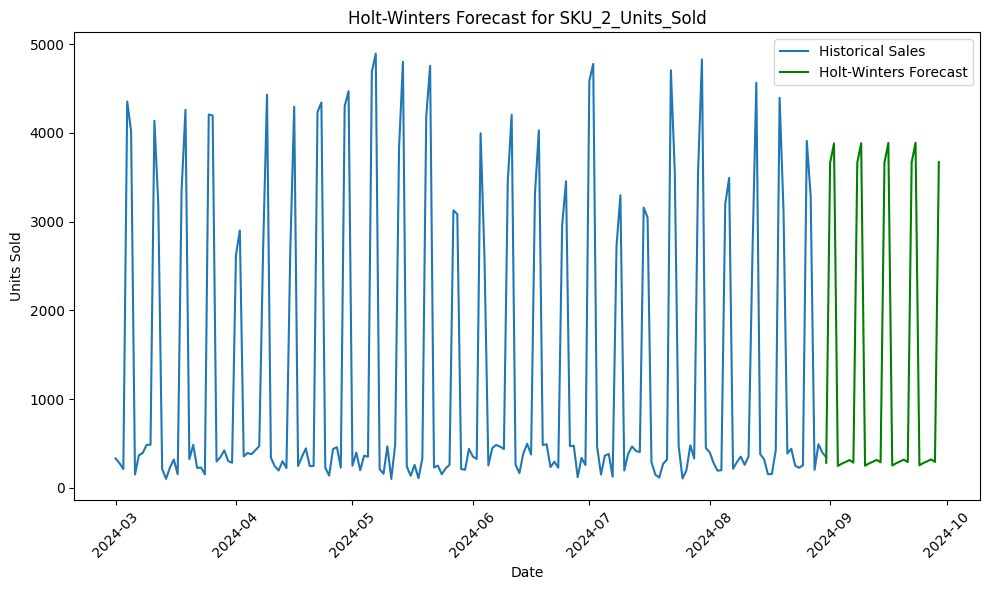

Holt-Winters Forecast for SKU_2_Units_Sold:
 2024-09-01     282.410411
2024-09-02    3660.396719
2024-09-03    3881.351370
2024-09-04     246.977110
2024-09-05     272.490482
2024-09-06     292.024915
2024-09-07     313.077930
2024-09-08     284.886666
2024-09-09    3662.872974
2024-09-10    3883.827625
2024-09-11     249.453365
2024-09-12     274.966738
2024-09-13     294.501171
2024-09-14     315.554186
2024-09-15     287.362921
2024-09-16    3665.349230
2024-09-17    3886.303881
2024-09-18     251.929621
2024-09-19     277.442993
2024-09-20     296.977426
2024-09-21     318.030441
2024-09-22     289.839177
2024-09-23    3667.825485
2024-09-24    3888.780136
2024-09-25     254.405876
2024-09-26     279.919248
2024-09-27     299.453682
2024-09-28     320.506696
2024-09-29     292.315432
2024-09-30    3670.301740
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


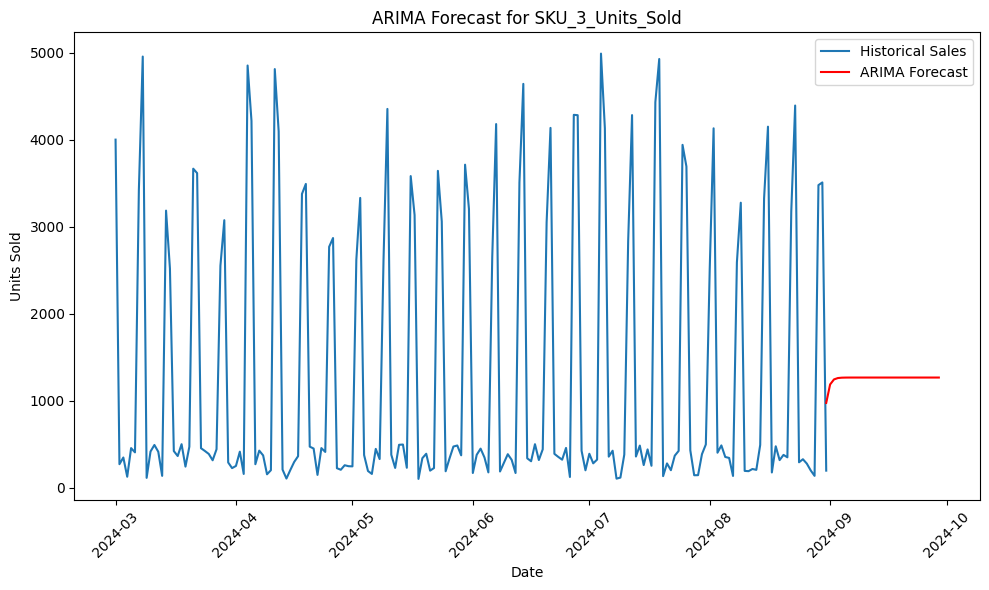

ARIMA Forecast for SKU_3_Units_Sold:
 2024-09-01     973.619663
2024-09-02    1185.734926
2024-09-03    1243.520373
2024-09-04    1259.262559
2024-09-05    1263.551120
2024-09-06    1264.719430
2024-09-07    1265.037706
2024-09-08    1265.124413
2024-09-09    1265.148034
2024-09-10    1265.154469
2024-09-11    1265.156222
2024-09-12    1265.156699
2024-09-13    1265.156829
2024-09-14    1265.156865
2024-09-15    1265.156874
2024-09-16    1265.156877
2024-09-17    1265.156878
2024-09-18    1265.156878
2024-09-19    1265.156878
2024-09-20    1265.156878
2024-09-21    1265.156878
2024-09-22    1265.156878
2024-09-23    1265.156878
2024-09-24    1265.156878
2024-09-25    1265.156878
2024-09-26    1265.156878
2024-09-27    1265.156878
2024-09-28    1265.156878
2024-09-29    1265.156878
2024-09-30    1265.156878
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


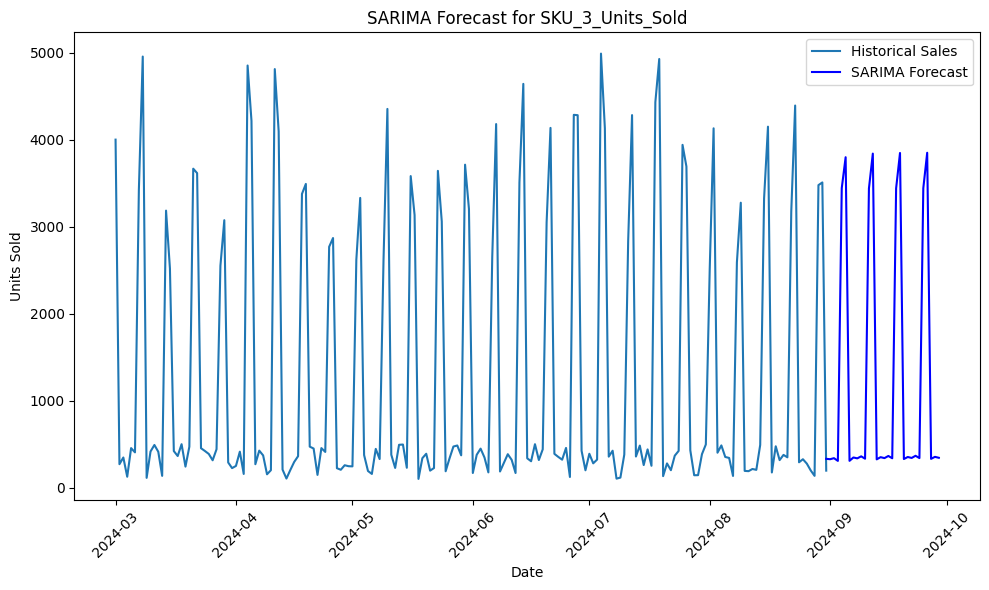

SARIMA Forecast for SKU_3_Units_Sold:
 2024-09-01     330.719577
2024-09-02     326.333967
2024-09-03     338.212618
2024-09-04     307.069846
2024-09-05    3442.708282
2024-09-06    3797.871123
2024-09-07     307.671692
2024-09-08     346.249266
2024-09-09     336.199095
2024-09-10     359.219158
2024-09-11     332.343804
2024-09-12    3439.422771
2024-09-13    3839.423042
2024-09-14     324.712751
2024-09-15     349.853372
2024-09-16     339.019662
2024-09-17     363.580833
2024-09-18     337.295760
2024-09-19    3440.424307
2024-09-20    3846.626607
2024-09-21     328.525910
2024-09-22     351.807897
2024-09-23     340.865806
2024-09-24     365.640148
2024-09-25     339.436724
2024-09-26    3442.018839
2024-09-27    3849.079019
2024-09-28     330.509353
2024-09-29     353.534249
2024-09-30     342.577166
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


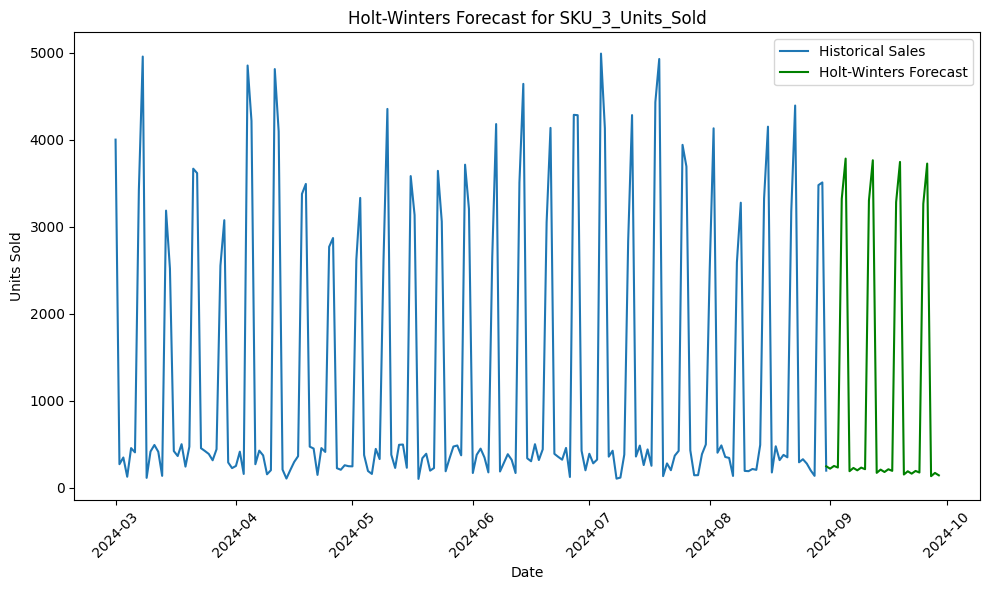

Holt-Winters Forecast for SKU_3_Units_Sold:
 2024-09-01     244.981203
2024-09-02     217.619342
2024-09-03     248.807247
2024-09-04     230.843812
2024-09-05    3319.759581
2024-09-06    3782.089479
2024-09-07     188.666472
2024-09-08     225.849332
2024-09-09     198.487471
2024-09-10     229.675376
2024-09-11     211.711940
2024-09-12    3300.627709
2024-09-13    3762.957608
2024-09-14     169.534601
2024-09-15     206.717461
2024-09-16     179.355600
2024-09-17     210.543505
2024-09-18     192.580069
2024-09-19    3281.495838
2024-09-20    3743.825736
2024-09-21     150.402729
2024-09-22     187.585590
2024-09-23     160.223729
2024-09-24     191.411634
2024-09-25     173.448198
2024-09-26    3262.363967
2024-09-27    3724.693865
2024-09-28     131.270858
2024-09-29     168.453719
2024-09-30     141.091858
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


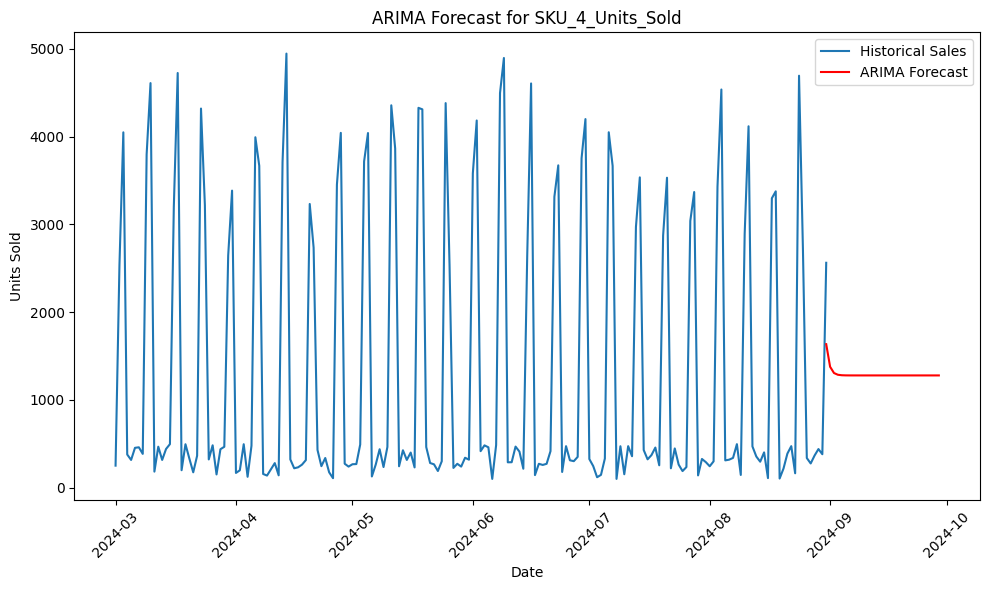

ARIMA Forecast for SKU_4_Units_Sold:
 2024-09-01    1634.517372
2024-09-02    1377.394445
2024-09-03    1306.113110
2024-09-04    1286.352022
2024-09-05    1280.873722
2024-09-06    1279.354991
2024-09-07    1278.933958
2024-09-08    1278.817236
2024-09-09    1278.784878
2024-09-10    1278.775907
2024-09-11    1278.773420
2024-09-12    1278.772731
2024-09-13    1278.772540
2024-09-14    1278.772487
2024-09-15    1278.772472
2024-09-16    1278.772468
2024-09-17    1278.772467
2024-09-18    1278.772467
2024-09-19    1278.772467
2024-09-20    1278.772467
2024-09-21    1278.772467
2024-09-22    1278.772467
2024-09-23    1278.772467
2024-09-24    1278.772467
2024-09-25    1278.772467
2024-09-26    1278.772467
2024-09-27    1278.772467
2024-09-28    1278.772467
2024-09-29    1278.772467
2024-09-30    1278.772467
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


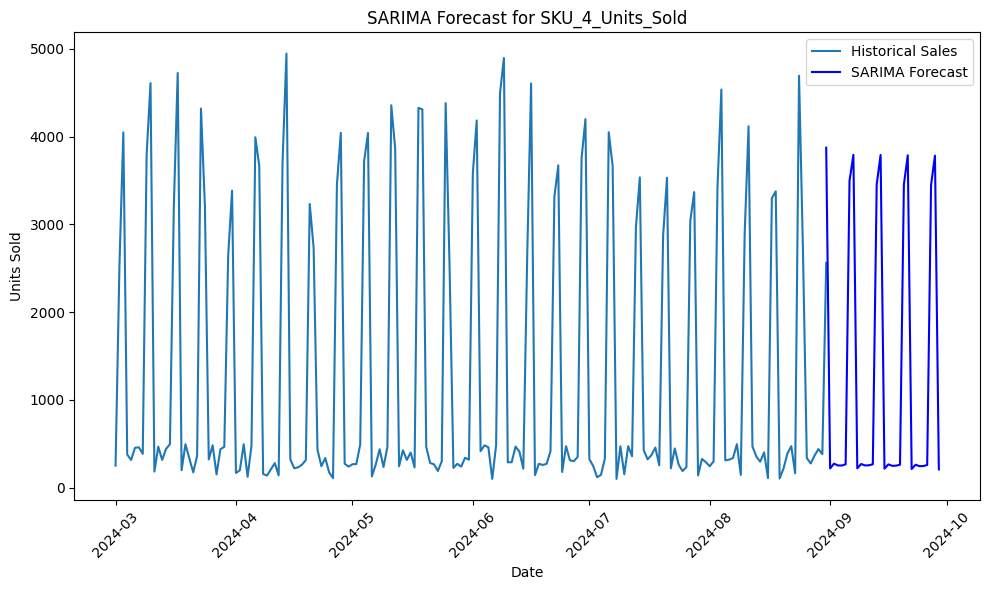

SARIMA Forecast for SKU_4_Units_Sold:
 2024-09-01    3873.019480
2024-09-02     219.187755
2024-09-03     273.994486
2024-09-04     253.187866
2024-09-05     252.256952
2024-09-06     266.437072
2024-09-07    3495.282150
2024-09-08    3791.746928
2024-09-09     220.720589
2024-09-10     269.746044
2024-09-11     253.193650
2024-09-12     255.101882
2024-09-13     266.507267
2024-09-14    3455.620574
2024-09-15    3790.554829
2024-09-16     216.388710
2024-09-17     265.633376
2024-09-18     248.919672
2024-09-19     250.720250
2024-09-20     262.230847
2024-09-21    3452.850687
2024-09-22    3786.326272
2024-09-23     212.279205
2024-09-24     261.515560
2024-09-25     244.807973
2024-09-26     246.612633
2024-09-27     258.119240
2024-09-28    3448.681956
2024-09-29    3782.212851
2024-09-30     208.161269
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


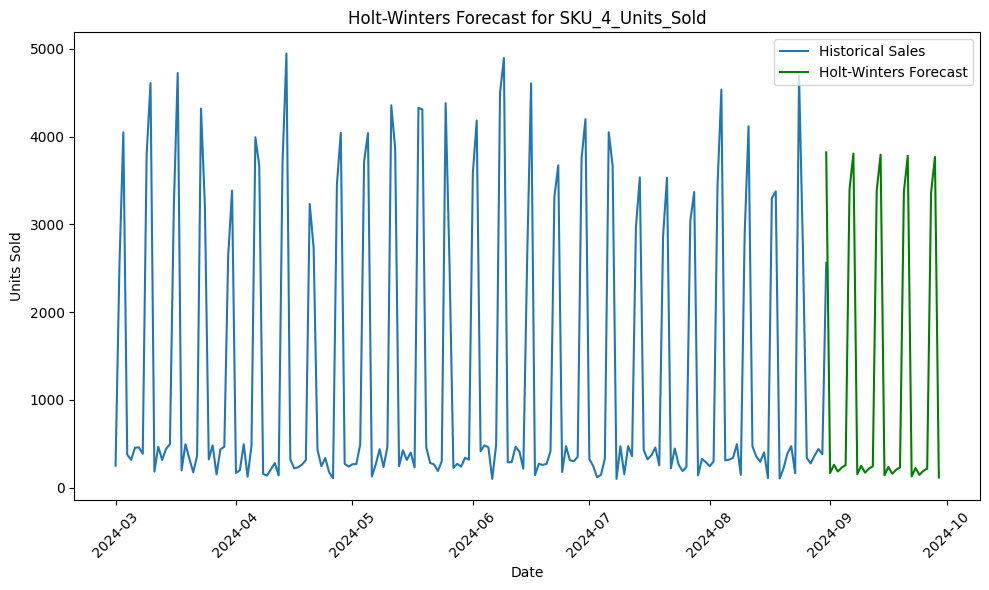

Holt-Winters Forecast for SKU_4_Units_Sold:
 2024-09-01    3819.559426
2024-09-02     167.291919
2024-09-03     261.547073
2024-09-04     184.260468
2024-09-05     229.916760
2024-09-06     256.851409
2024-09-07    3398.351663
2024-09-08    3806.619816
2024-09-09     154.352308
2024-09-10     248.607463
2024-09-11     171.320857
2024-09-12     216.977149
2024-09-13     243.911799
2024-09-14    3385.412052
2024-09-15    3793.680205
2024-09-16     141.412698
2024-09-17     235.667852
2024-09-18     158.381247
2024-09-19     204.037539
2024-09-20     230.972188
2024-09-21    3372.472442
2024-09-22    3780.740595
2024-09-23     128.473087
2024-09-24     222.728242
2024-09-25     145.441636
2024-09-26     191.097928
2024-09-27     218.032578
2024-09-28    3359.532831
2024-09-29    3767.800984
2024-09-30     115.533477
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


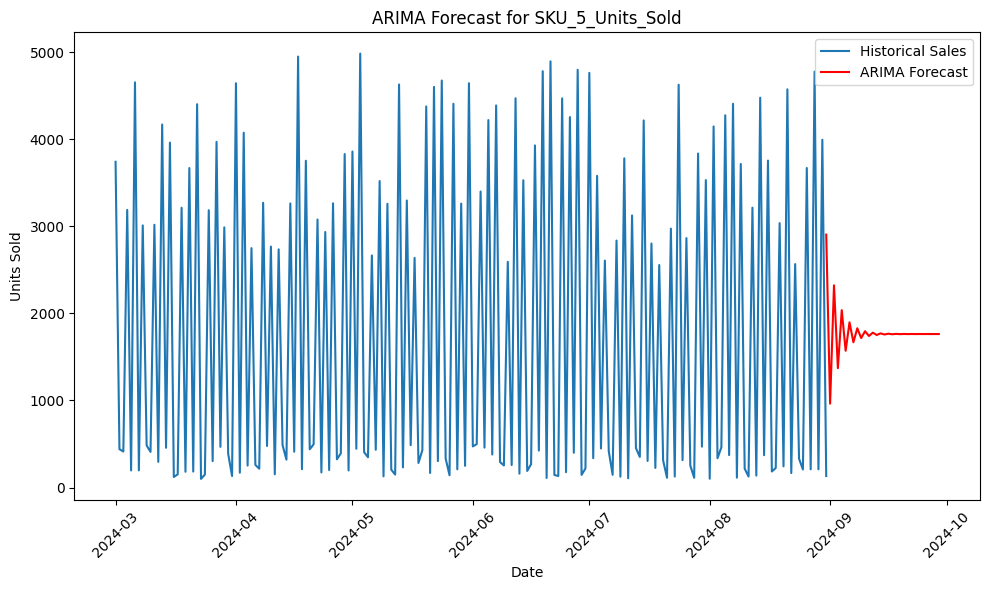

ARIMA Forecast for SKU_5_Units_Sold:
 2024-09-01    2904.100785
2024-09-02     963.931809
2024-09-03    2322.329048
2024-09-04    1371.255671
2024-09-05    2037.143780
2024-09-06    1570.926363
2024-09-07    1897.345587
2024-09-08    1668.805198
2024-09-09    1828.816330
2024-09-10    1716.785531
2024-09-11    1795.223198
2024-09-12    1740.305553
2024-09-13    1778.755800
2024-09-14    1751.835099
2024-09-15    1770.683461
2024-09-16    1757.486898
2024-09-17    1766.726389
2024-09-18    1760.257417
2024-09-19    1764.786627
2024-09-20    1761.615529
2024-09-21    1763.835754
2024-09-22    1762.281277
2024-09-23    1763.369634
2024-09-24    1762.607628
2024-09-25    1763.141142
2024-09-26    1762.767605
2024-09-27    1763.029135
2024-09-28    1762.846026
2024-09-29    1762.974228
2024-09-30    1762.884469
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


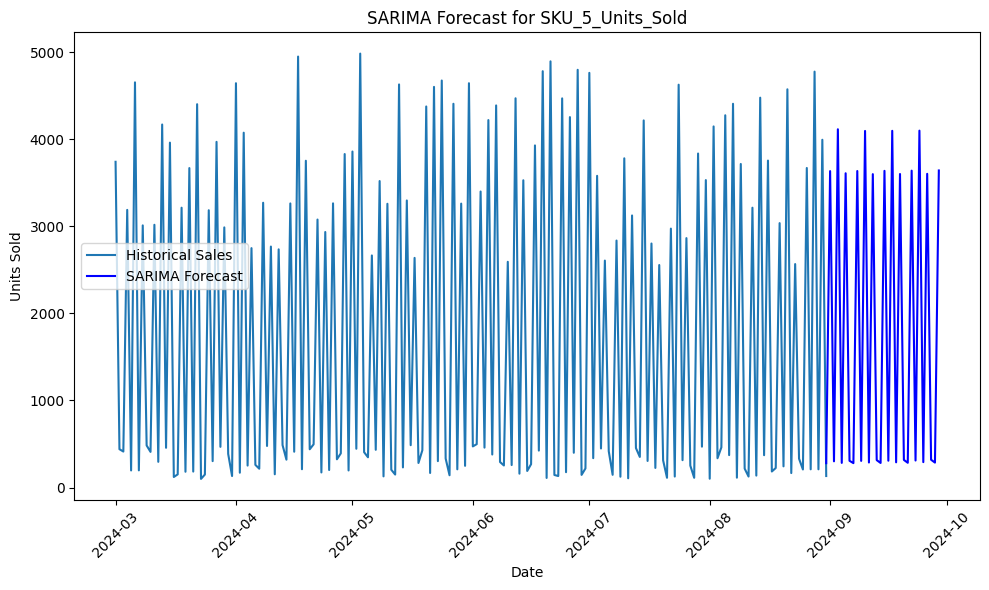

SARIMA Forecast for SKU_5_Units_Sold:
 2024-09-01     280.836513
2024-09-02    3633.159147
2024-09-03     301.808634
2024-09-04    4113.308587
2024-09-05     283.840545
2024-09-06    3608.411454
2024-09-07     308.015087
2024-09-08     281.046266
2024-09-09    3634.135480
2024-09-10     306.774310
2024-09-11    4094.147810
2024-09-12     288.233066
2024-09-13    3598.124068
2024-09-14     315.647440
2024-09-15     283.080968
2024-09-16    3636.194729
2024-09-17     308.961307
2024-09-18    4095.562224
2024-09-19     290.401709
2024-09-20    3599.822628
2024-09-21     317.919829
2024-09-22     285.174108
2024-09-23    3638.288655
2024-09-24     311.059324
2024-09-25    4097.635502
2024-09-26     292.499138
2024-09-27    3601.905005
2024-09-28     320.020581
2024-09-29     287.269120
2024-09-30    3640.383692
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


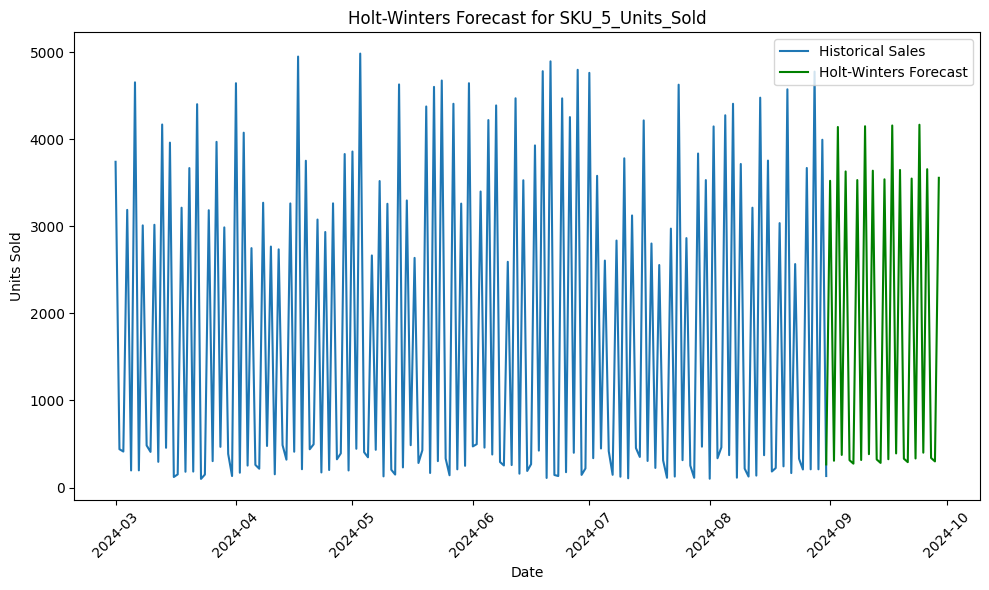

Holt-Winters Forecast for SKU_5_Units_Sold:
 2024-09-01     266.506463
2024-09-02    3521.636332
2024-09-03     308.491091
2024-09-04    4139.512819
2024-09-05     375.257810
2024-09-06    3629.202148
2024-09-07     314.690219
2024-09-08     275.123402
2024-09-09    3530.253271
2024-09-10     317.108030
2024-09-11    4148.129759
2024-09-12     383.874750
2024-09-13    3637.819088
2024-09-14     323.307158
2024-09-15     283.740341
2024-09-16    3538.870210
2024-09-17     325.724969
2024-09-18    4156.746698
2024-09-19     392.491689
2024-09-20    3646.436027
2024-09-21     331.924097
2024-09-22     292.357280
2024-09-23    3547.487150
2024-09-24     334.341908
2024-09-25    4165.363637
2024-09-26     401.108628
2024-09-27    3655.052966
2024-09-28     340.541036
2024-09-29     300.974219
2024-09-30    3556.104089
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


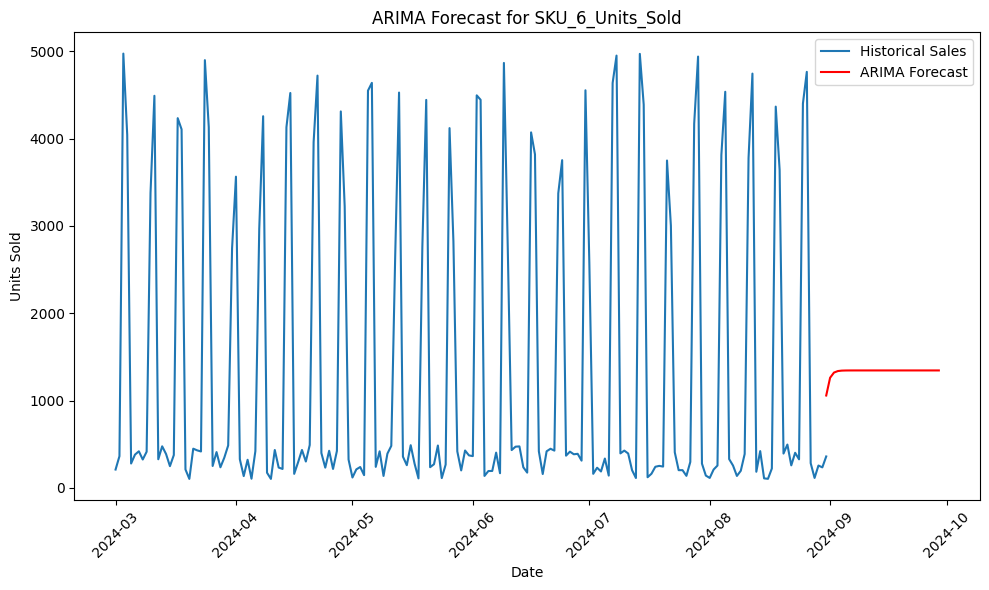

ARIMA Forecast for SKU_6_Units_Sold:
 2024-09-01    1057.766619
2024-09-02    1261.090443
2024-09-03    1320.337441
2024-09-04    1337.601560
2024-09-05    1342.632192
2024-09-06    1344.098079
2024-09-07    1344.525227
2024-09-08    1344.649695
2024-09-09    1344.685964
2024-09-10    1344.696532
2024-09-11    1344.699612
2024-09-12    1344.700509
2024-09-13    1344.700771
2024-09-14    1344.700847
2024-09-15    1344.700869
2024-09-16    1344.700876
2024-09-17    1344.700878
2024-09-18    1344.700878
2024-09-19    1344.700878
2024-09-20    1344.700878
2024-09-21    1344.700878
2024-09-22    1344.700878
2024-09-23    1344.700878
2024-09-24    1344.700878
2024-09-25    1344.700878
2024-09-26    1344.700878
2024-09-27    1344.700878
2024-09-28    1344.700878
2024-09-29    1344.700878
2024-09-30    1344.700878
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


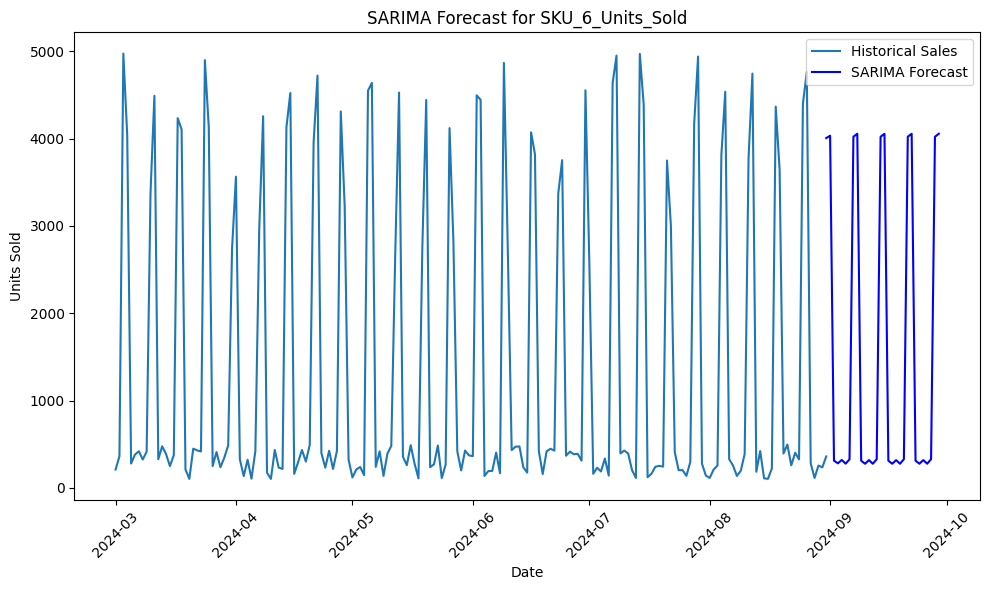

SARIMA Forecast for SKU_6_Units_Sold:
 2024-09-01    4004.868788
2024-09-02    4031.841142
2024-09-03     311.534467
2024-09-04     281.327885
2024-09-05     319.623647
2024-09-06     277.703342
2024-09-07     326.938787
2024-09-08    4020.228374
2024-09-09    4054.278234
2024-09-10     310.879573
2024-09-11     276.370508
2024-09-12     317.862574
2024-09-13     276.586290
2024-09-14     328.155012
2024-09-15    4019.953425
2024-09-16    4053.785325
2024-09-17     311.097807
2024-09-18     276.721242
2024-09-19     318.114875
2024-09-20     276.818757
2024-09-21     328.315623
2024-09-22    4020.159958
2024-09-23    4053.998571
2024-09-24     311.289153
2024-09-25     276.908507
2024-09-26     318.305171
2024-09-27     277.009664
2024-09-28     328.508743
2024-09-29    4020.351664
2024-09-30    4054.190070
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


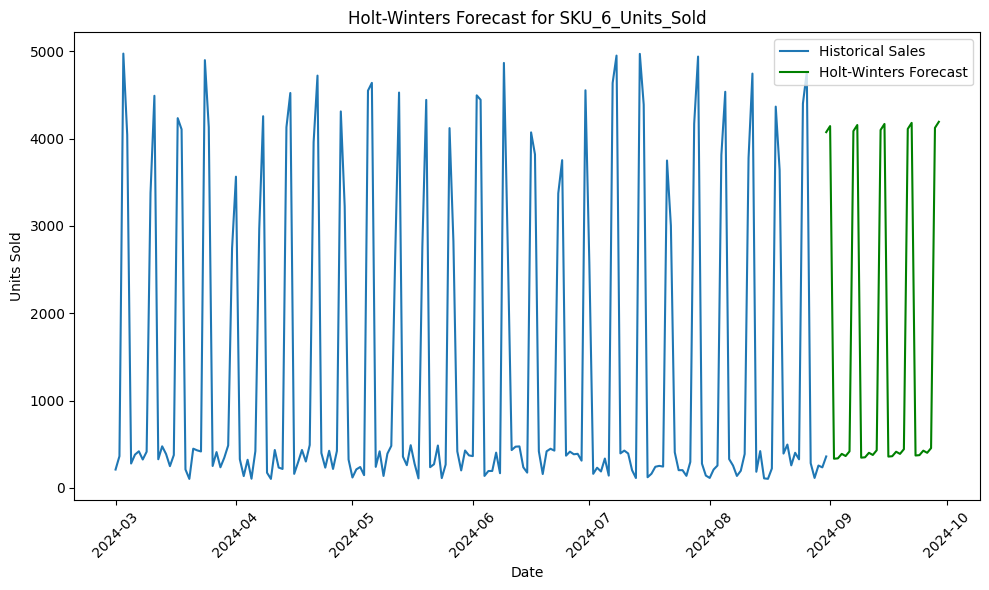

Holt-Winters Forecast for SKU_6_Units_Sold:
 2024-09-01    4072.655617
2024-09-02    4141.979206
2024-09-03     334.021472
2024-09-04     338.006418
2024-09-05     389.342500
2024-09-06     364.869849
2024-09-07     418.361526
2024-09-08    4084.960045
2024-09-09    4154.283634
2024-09-10     346.325901
2024-09-11     350.310846
2024-09-12     401.646929
2024-09-13     377.174278
2024-09-14     430.665954
2024-09-15    4097.264473
2024-09-16    4166.588063
2024-09-17     358.630329
2024-09-18     362.615275
2024-09-19     413.951357
2024-09-20     389.478706
2024-09-21     442.970383
2024-09-22    4109.568902
2024-09-23    4178.892491
2024-09-24     370.934758
2024-09-25     374.919703
2024-09-26     426.255786
2024-09-27     401.783134
2024-09-28     455.274811
2024-09-29    4121.873330
2024-09-30    4191.196920
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


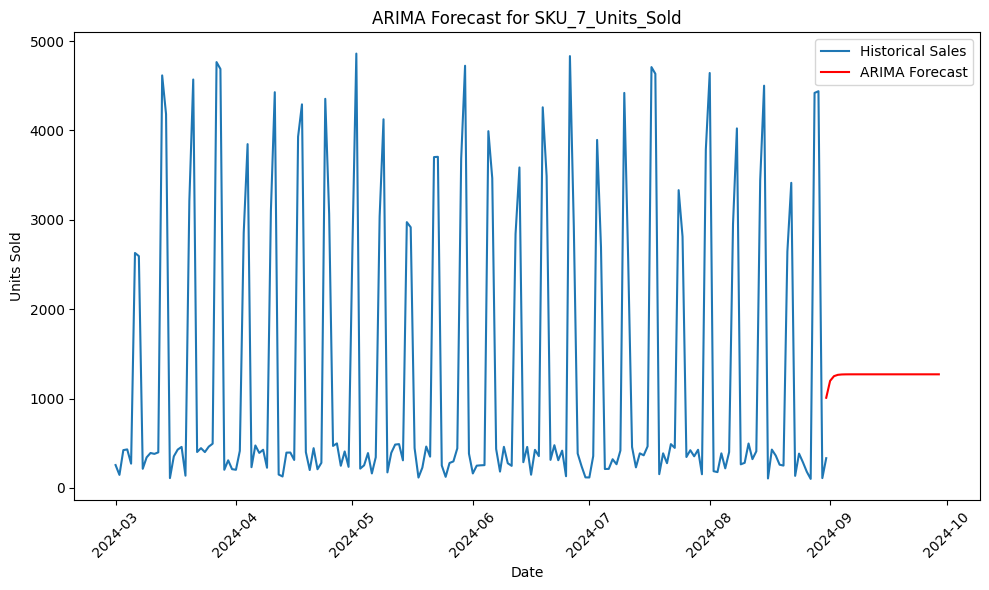

ARIMA Forecast for SKU_7_Units_Sold:
 2024-09-01    1008.944868
2024-09-02    1197.890119
2024-09-03    1250.705533
2024-09-04    1265.468899
2024-09-05    1269.595667
2024-09-06    1270.749213
2024-09-07    1271.071661
2024-09-08    1271.161794
2024-09-09    1271.186989
2024-09-10    1271.194031
2024-09-11    1271.196000
2024-09-12    1271.196550
2024-09-13    1271.196704
2024-09-14    1271.196747
2024-09-15    1271.196759
2024-09-16    1271.196762
2024-09-17    1271.196763
2024-09-18    1271.196764
2024-09-19    1271.196764
2024-09-20    1271.196764
2024-09-21    1271.196764
2024-09-22    1271.196764
2024-09-23    1271.196764
2024-09-24    1271.196764
2024-09-25    1271.196764
2024-09-26    1271.196764
2024-09-27    1271.196764
2024-09-28    1271.196764
2024-09-29    1271.196764
2024-09-30    1271.196764
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


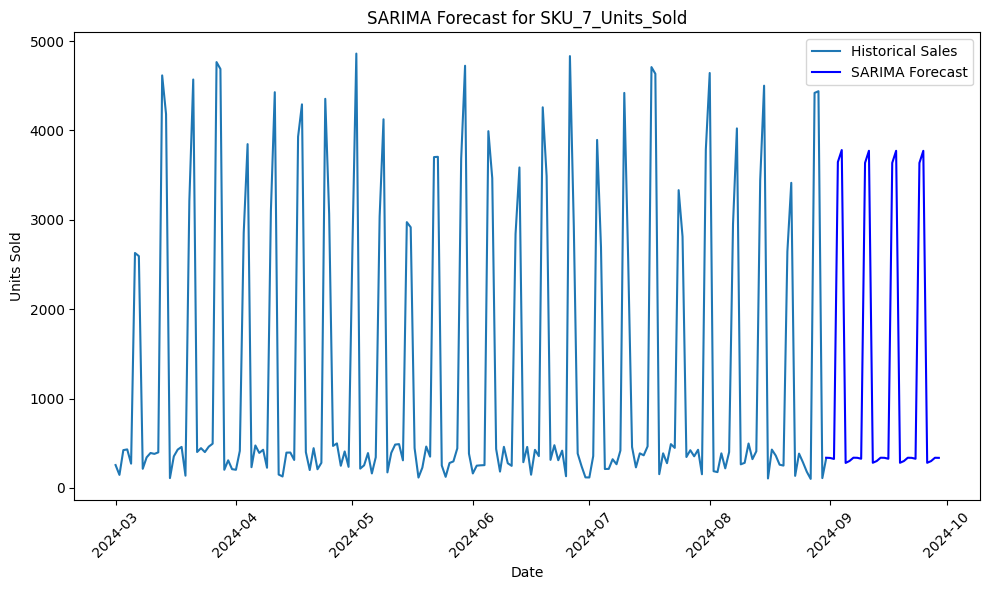

SARIMA Forecast for SKU_7_Units_Sold:
 2024-09-01     337.807427
2024-09-02     335.504934
2024-09-03     324.242144
2024-09-04    3646.814613
2024-09-05    3780.491196
2024-09-06     279.874593
2024-09-07     301.434071
2024-09-08     338.197176
2024-09-09     337.105386
2024-09-10     326.655310
2024-09-11    3637.446645
2024-09-12    3772.479092
2024-09-13     281.656775
2024-09-14     300.834546
2024-09-15     337.975475
2024-09-16     336.898000
2024-09-17     326.457532
2024-09-18    3637.109574
2024-09-19    3772.158053
2024-09-20     281.451537
2024-09-21     300.601149
2024-09-22     337.746544
2024-09-23     336.669238
2024-09-24     326.228884
2024-09-25    3636.879280
2024-09-26    3771.927947
2024-09-27     281.222801
2024-09-28     300.372080
2024-09-29     337.517528
2024-09-30     336.440224
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


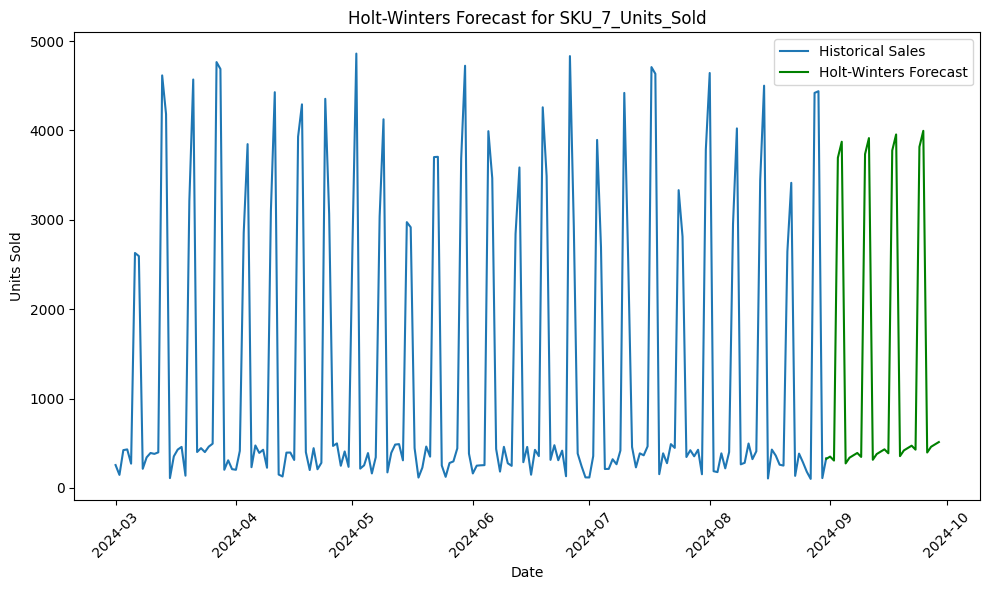

Holt-Winters Forecast for SKU_7_Units_Sold:
 2024-09-01     324.330396
2024-09-02     350.528796
2024-09-03     306.323070
2024-09-04    3694.341402
2024-09-05    3873.719114
2024-09-06     274.295568
2024-09-07     338.309905
2024-09-08     365.006492
2024-09-09     391.204892
2024-09-10     346.999165
2024-09-11    3735.017497
2024-09-12    3914.395209
2024-09-13     314.971663
2024-09-14     378.986000
2024-09-15     405.682587
2024-09-16     431.880987
2024-09-17     387.675260
2024-09-18    3775.693593
2024-09-19    3955.071305
2024-09-20     355.647759
2024-09-21     419.662095
2024-09-22     446.358682
2024-09-23     472.557082
2024-09-24     428.351356
2024-09-25    3816.369688
2024-09-26    3995.747400
2024-09-27     396.323854
2024-09-28     460.338190
2024-09-29     487.034778
2024-09-30     513.233178
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


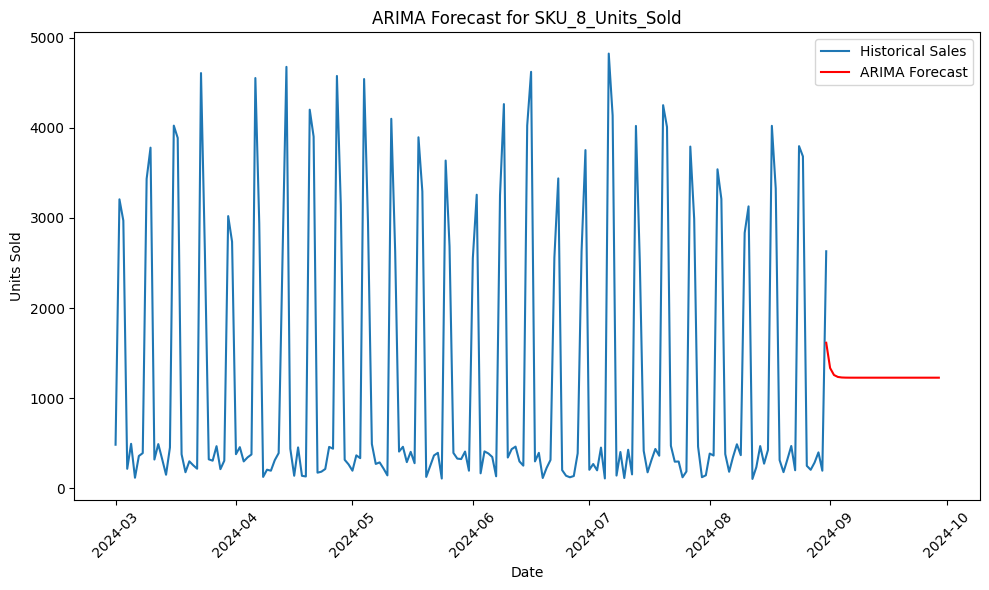

ARIMA Forecast for SKU_8_Units_Sold:
 2024-09-01    1615.832694
2024-09-02    1335.453394
2024-09-03    1257.939012
2024-09-04    1236.509187
2024-09-05    1230.584643
2024-09-06    1228.946728
2024-09-07    1228.493906
2024-09-08    1228.368717
2024-09-09    1228.334108
2024-09-10    1228.324539
2024-09-11    1228.321894
2024-09-12    1228.321163
2024-09-13    1228.320960
2024-09-14    1228.320905
2024-09-15    1228.320889
2024-09-16    1228.320885
2024-09-17    1228.320884
2024-09-18    1228.320883
2024-09-19    1228.320883
2024-09-20    1228.320883
2024-09-21    1228.320883
2024-09-22    1228.320883
2024-09-23    1228.320883
2024-09-24    1228.320883
2024-09-25    1228.320883
2024-09-26    1228.320883
2024-09-27    1228.320883
2024-09-28    1228.320883
2024-09-29    1228.320883
2024-09-30    1228.320883
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


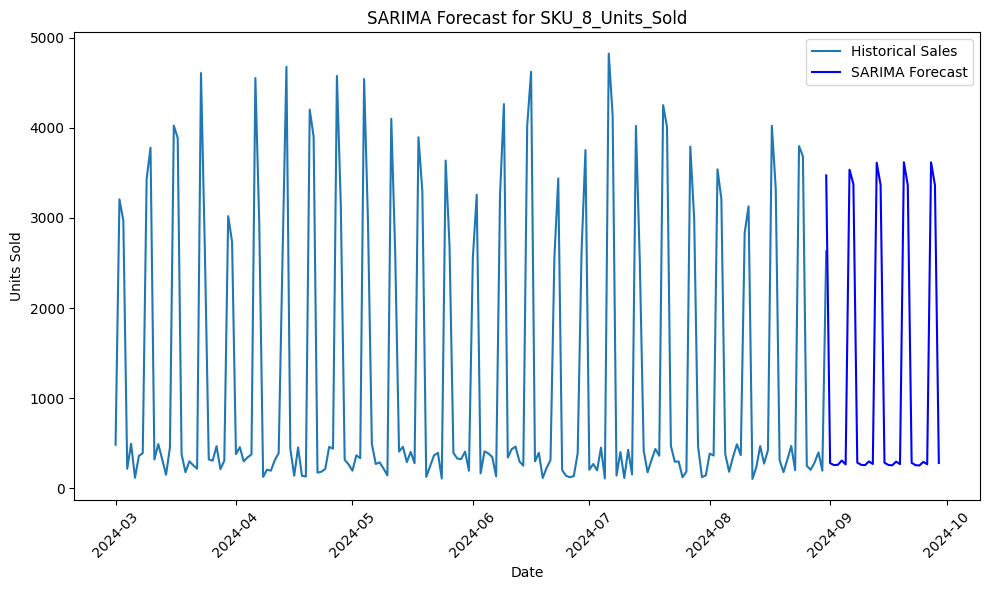

SARIMA Forecast for SKU_8_Units_Sold:
 2024-09-01    3471.041983
2024-09-02     280.529451
2024-09-03     259.419591
2024-09-04     262.475306
2024-09-05     309.573978
2024-09-06     267.040098
2024-09-07    3534.321015
2024-09-08    3376.281033
2024-09-09     286.875948
2024-09-10     261.887200
2024-09-11     258.597815
2024-09-12     299.857393
2024-09-13     271.465617
2024-09-14    3612.260402
2024-09-15    3366.184673
2024-09-16     285.688837
2024-09-17     260.358295
2024-09-18     256.509802
2024-09-19     297.254857
2024-09-20     270.109237
2024-09-21    3617.381817
2024-09-22    3363.548674
2024-09-23     283.837891
2024-09-24     258.477231
2024-09-25     254.579470
2024-09-26     295.279188
2024-09-27     268.243375
2024-09-28    3616.086757
2024-09-29    3361.570056
2024-09-30     281.928449
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


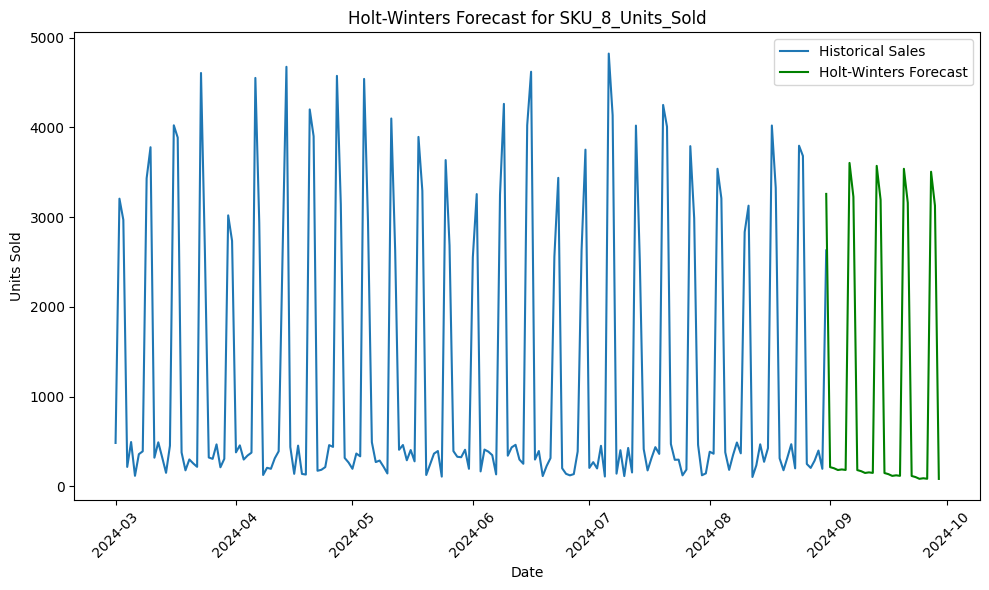

Holt-Winters Forecast for SKU_8_Units_Sold:
 2024-09-01    3259.017378
2024-09-02     215.434358
2024-09-03     203.133663
2024-09-04     183.569031
2024-09-05     189.888813
2024-09-06     184.171017
2024-09-07    3604.227289
2024-09-08    3226.278807
2024-09-09     182.695787
2024-09-10     170.395092
2024-09-11     150.830460
2024-09-12     157.150242
2024-09-13     151.432446
2024-09-14    3571.488718
2024-09-15    3193.540236
2024-09-16     149.957216
2024-09-17     137.656521
2024-09-18     118.091889
2024-09-19     124.411671
2024-09-20     118.693875
2024-09-21    3538.750148
2024-09-22    3160.801665
2024-09-23     117.218645
2024-09-24     104.917950
2024-09-25      85.353319
2024-09-26      91.673100
2024-09-27      85.955304
2024-09-28    3506.011577
2024-09-29    3128.063094
2024-09-30      84.480074
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


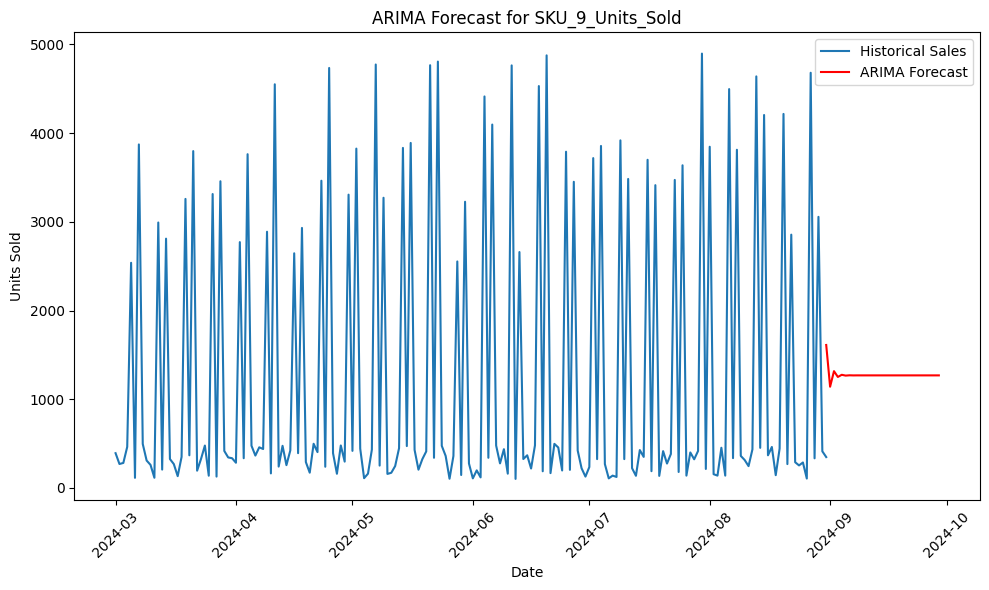

ARIMA Forecast for SKU_9_Units_Sold:
 2024-09-01    1611.598222
2024-09-02    1141.288446
2024-09-03    1316.337193
2024-09-04    1251.184255
2024-09-05    1275.434102
2024-09-06    1266.408337
2024-09-07    1269.767716
2024-09-08    1268.517359
2024-09-09    1268.982741
2024-09-10    1268.809526
2024-09-11    1268.873996
2024-09-12    1268.850001
2024-09-13    1268.858932
2024-09-14    1268.855608
2024-09-15    1268.856845
2024-09-16    1268.856384
2024-09-17    1268.856556
2024-09-18    1268.856492
2024-09-19    1268.856516
2024-09-20    1268.856507
2024-09-21    1268.856510
2024-09-22    1268.856509
2024-09-23    1268.856510
2024-09-24    1268.856509
2024-09-25    1268.856509
2024-09-26    1268.856509
2024-09-27    1268.856509
2024-09-28    1268.856509
2024-09-29    1268.856509
2024-09-30    1268.856509
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


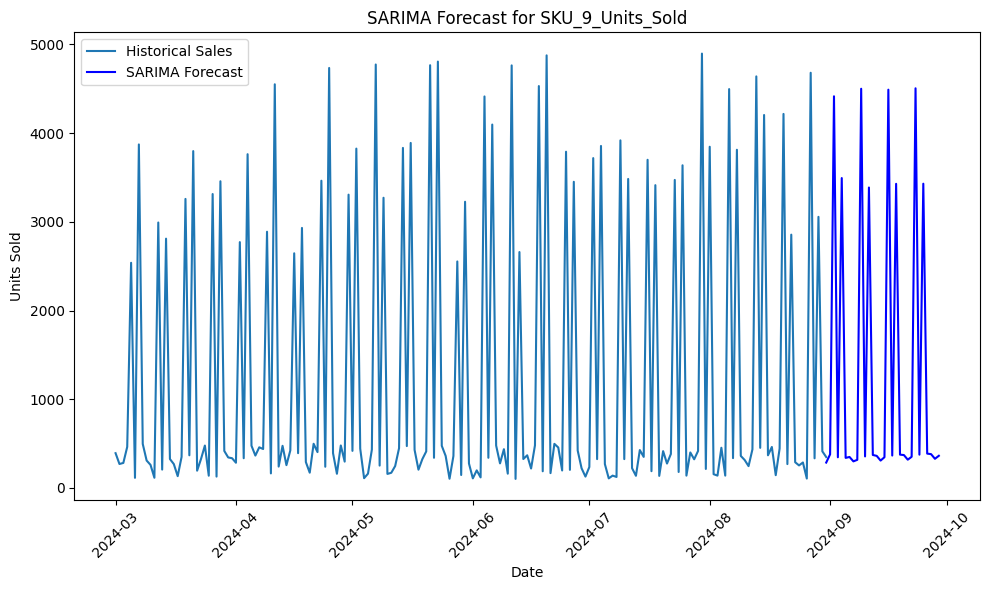

SARIMA Forecast for SKU_9_Units_Sold:
 2024-09-01     286.118084
2024-09-02     378.745284
2024-09-03    4414.710914
2024-09-04     345.772612
2024-09-05    3493.041884
2024-09-06     338.854488
2024-09-07     349.159051
2024-09-08     299.637200
2024-09-09     316.984382
2024-09-10    4499.825835
2024-09-11     355.240154
2024-09-12    3386.397798
2024-09-13     371.780275
2024-09-14     361.524377
2024-09-15     308.627849
2024-09-16     346.528790
2024-09-17    4489.268627
2024-09-18     365.337007
2024-09-19    3428.196695
2024-09-20     375.472306
2024-09-21     370.830046
2024-09-22     318.854908
2024-09-23     351.144041
2024-09-24    4504.832852
2024-09-25     375.262039
2024-09-26    3429.466094
2024-09-27     387.146051
2024-09-28     380.971095
2024-09-29     328.744389
2024-09-30     362.565719
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


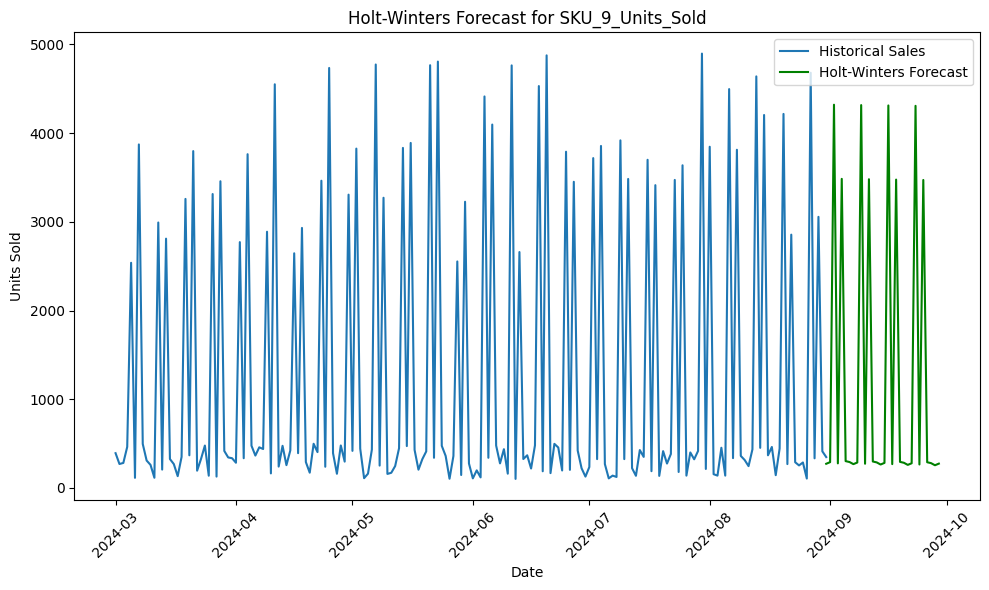

Holt-Winters Forecast for SKU_9_Units_Sold:
 2024-09-01     272.526979
2024-09-02     290.833243
2024-09-03    4319.764757
2024-09-04     277.047361
2024-09-05    3484.028493
2024-09-06     302.364284
2024-09-07     292.141867
2024-09-08     268.337562
2024-09-09     286.643825
2024-09-10    4315.575339
2024-09-11     272.857943
2024-09-12    3479.839076
2024-09-13     298.174867
2024-09-14     287.952450
2024-09-15     264.148144
2024-09-16     282.454408
2024-09-17    4311.385922
2024-09-18     268.668526
2024-09-19    3475.649658
2024-09-20     293.985449
2024-09-21     283.763032
2024-09-22     259.958727
2024-09-23     278.264991
2024-09-24    4307.196505
2024-09-25     264.479108
2024-09-26    3471.460241
2024-09-27     289.796032
2024-09-28     279.573615
2024-09-29     255.769310
2024-09-30     274.075573
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


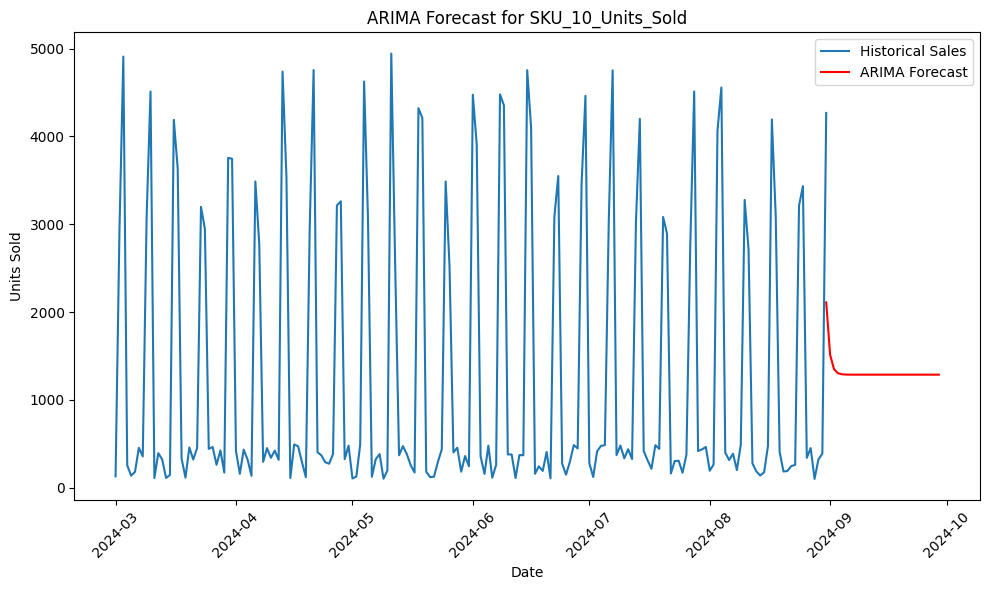

ARIMA Forecast for SKU_10_Units_Sold:
 2024-09-01    2111.297070
2024-09-02    1515.368169
2024-09-03    1350.704204
2024-09-04    1305.205116
2024-09-05    1292.633046
2024-09-06    1289.159197
2024-09-07    1288.199321
2024-09-08    1287.934093
2024-09-09    1287.860807
2024-09-10    1287.840557
2024-09-11    1287.834961
2024-09-12    1287.833415
2024-09-13    1287.832988
2024-09-14    1287.832870
2024-09-15    1287.832837
2024-09-16    1287.832828
2024-09-17    1287.832826
2024-09-18    1287.832825
2024-09-19    1287.832825
2024-09-20    1287.832825
2024-09-21    1287.832825
2024-09-22    1287.832825
2024-09-23    1287.832825
2024-09-24    1287.832825
2024-09-25    1287.832825
2024-09-26    1287.832825
2024-09-27    1287.832825
2024-09-28    1287.832825
2024-09-29    1287.832825
2024-09-30    1287.832825
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


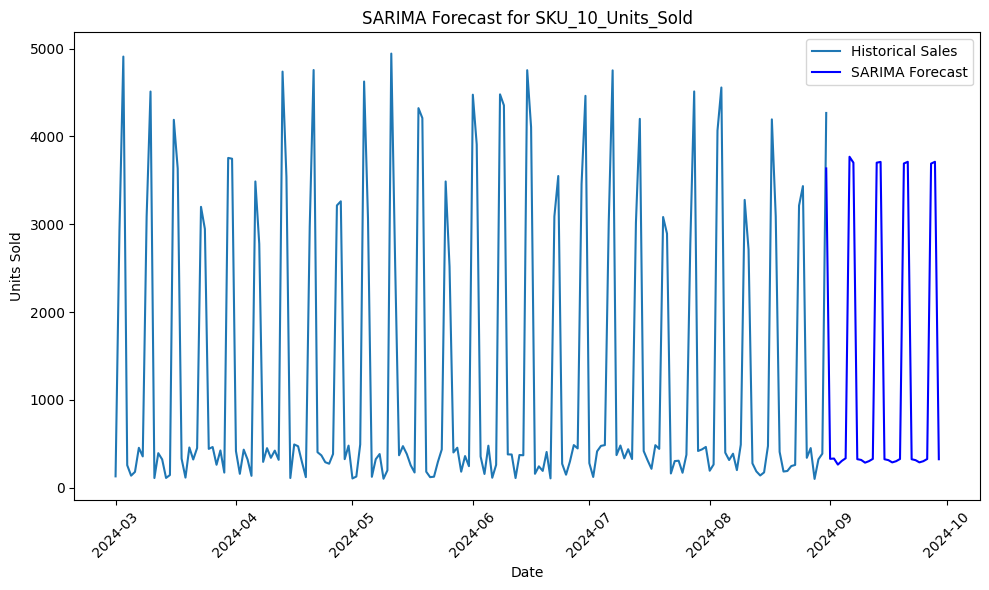

SARIMA Forecast for SKU_10_Units_Sold:
 2024-09-01    3636.342005
2024-09-02     329.532000
2024-09-03     332.931943
2024-09-04     263.965708
2024-09-05     305.528365
2024-09-06     335.789428
2024-09-07    3769.234600
2024-09-08    3701.880417
2024-09-09     325.639228
2024-09-10     316.910170
2024-09-11     285.957906
2024-09-12     302.980757
2024-09-13     328.676420
2024-09-14    3701.702717
2024-09-15    3710.698886
2024-09-16     325.063651
2024-09-17     314.693538
2024-09-18     288.884568
2024-09-19     302.587181
2024-09-20     327.665145
2024-09-21    3692.516763
2024-09-22    3711.843141
2024-09-23     324.936891
2024-09-24     314.344744
2024-09-25     289.231662
2024-09-26     302.485046
2024-09-27     327.479435
2024-09-28    3691.225019
2024-09-29    3711.949075
2024-09-30     324.870857
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


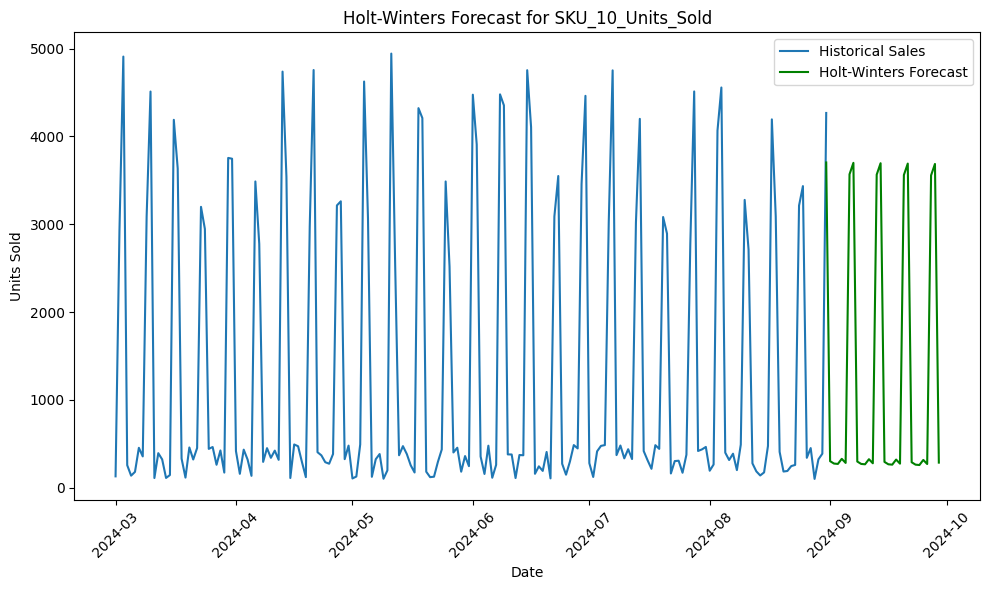

Holt-Winters Forecast for SKU_10_Units_Sold:
 2024-09-01    3704.225736
2024-09-02     302.997984
2024-09-03     275.624394
2024-09-04     271.515301
2024-09-05     329.398451
2024-09-06     282.967929
2024-09-07    3569.816358
2024-09-08    3700.069212
2024-09-09     298.841459
2024-09-10     271.467869
2024-09-11     267.358776
2024-09-12     325.241927
2024-09-13     278.811404
2024-09-14    3565.659833
2024-09-15    3695.912687
2024-09-16     294.684934
2024-09-17     267.311345
2024-09-18     263.202252
2024-09-19     321.085402
2024-09-20     274.654879
2024-09-21    3561.503309
2024-09-22    3691.756162
2024-09-23     290.528410
2024-09-24     263.154820
2024-09-25     259.045727
2024-09-26     316.928877
2024-09-27     270.498355
2024-09-28    3557.346784
2024-09-29    3687.599638
2024-09-30     286.371885
Freq: D, dtype: float64


In [7]:
def forecast_sku_sales(data, sku, forecast_steps=30):
    """
    Forecast sales for a given SKU using ARIMA, SARIMA, and Holt-Winters models.
    """
    # Check for sufficient variation
    if len(data[sku].unique()) <= 1:
        print(f"Insufficient variation in {sku} to perform forecasting.")
        return

    # ARIMA Model
    try:
        arima_model = ARIMA(data[sku], order=(1, 1, 1))
        arima_fit = arima_model.fit()
        forecast_arima = arima_fit.forecast(steps=forecast_steps)

        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data[sku], label='Historical Sales')
        plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='D'), forecast_arima, label='ARIMA Forecast', color='red')
        plt.title(f'ARIMA Forecast for {sku}')
        plt.xlabel('Date')
        plt.ylabel('Units Sold')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"ARIMA Forecast for {sku}:\n", forecast_arima)
    except Exception as e:
        print(f"ARIMA model failed for {sku}: {e}")

    # SARIMA Model
    try:
        sarima_model = SARIMAX(data[sku], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
        sarima_fit = sarima_model.fit()
        forecast_sarima = sarima_fit.forecast(forecast_steps)

        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data[sku], label='Historical Sales')
        plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='D'), forecast_sarima, label='SARIMA Forecast', color='blue')
        plt.title(f'SARIMA Forecast for {sku}')
        plt.xlabel('Date')
        plt.ylabel('Units Sold')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"SARIMA Forecast for {sku}:\n", forecast_sarima)
    except Exception as e:
        print(f"SARIMA model failed for {sku}: {e}")

    # Holt-Winters Model
    try:
        hw_model = ExponentialSmoothing(data[sku], trend='add', seasonal='add', seasonal_periods=7)
        hw_fit = hw_model.fit()
        forecast_hw = hw_fit.forecast(forecast_steps)

        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data[sku], label='Historical Sales')
        plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='D'), forecast_hw, label='Holt-Winters Forecast', color='green')
        plt.title(f'Holt-Winters Forecast for {sku}')
        plt.xlabel('Date')
        plt.ylabel('Units Sold')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"Holt-Winters Forecast for {sku}:\n", forecast_hw)
    except Exception as e:
        print(f"Holt-Winters model failed for {sku}: {e}")

# Example usage for all SKUs
for sku in sku_columns:
    forecast_sku_sales(data, sku)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_models(data, sku, forecast_steps=30):
    """
    Split data into training and testing sets, fit models, forecast, and evaluate.
    """
    # Define train and test sizes
    train_size = int(len(data) * 0.8)
    train, test = data[sku][:train_size], data[sku][train_size:]

    # ARIMA
    try:
        arima_model = ARIMA(train, order=(1, 1, 1))
        arima_fit = arima_model.fit()
        forecast_arima = arima_fit.forecast(steps=len(test))
        mae_arima = mean_absolute_error(test, forecast_arima)
        rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
        print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}")
    except:
        print("ARIMA evaluation failed.")

    # SARIMA
    try:
        sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
        sarima_fit = sarima_model.fit()
        forecast_sarima = sarima_fit.forecast(steps=len(test))
        mae_sarima = mean_absolute_error(test, forecast_sarima)
        rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
        print(f"SARIMA - MAE: {mae_sarima}, RMSE: {rmse_sarima}")
    except:
        print("SARIMA evaluation failed.")

    # Holt-Winters
    try:
        hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
        hw_fit = hw_model.fit()
        forecast_hw = hw_fit.forecast(steps=len(test))
        mae_hw = mean_absolute_error(test, forecast_hw)
        rmse_hw = np.sqrt(mean_squared_error(test, forecast_hw))
        print(f"Holt-Winters - MAE: {mae_hw}, RMSE: {rmse_hw}")
    except:
        print("Holt-Winters evaluation failed.")

# Example usage for all SKUs
for sku in sku_columns:
    print(f"Evaluating models for {sku}:")
    evaluate_models(data, sku)
    print("-" * 50)

Evaluating models for SKU_1_Units_Sold:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 1420.2523094774717, RMSE: 1609.6581276549794


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA - MAE: 168.56411344831446, RMSE: 229.54465156887125
Holt-Winters - MAE: 159.13512834294687, RMSE: 228.5802196610506
--------------------------------------------------
Evaluating models for SKU_2_Units_Sold:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 1352.9276457944884, RMSE: 1540.455456368985


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA - MAE: 236.1107667733863, RMSE: 361.35915501043866
Holt-Winters - MAE: 235.95179315787135, RMSE: 359.05365758291254
--------------------------------------------------
Evaluating models for SKU_3_Units_Sold:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 1331.5806590589928, RMSE: 1467.9535265410236


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA - MAE: 260.91168294594866, RMSE: 379.09826707176995
Holt-Winters - MAE: 350.17077207946755, RMSE: 460.2160768292495
--------------------------------------------------
Evaluating models for SKU_4_Units_Sold:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 1327.4271883461895, RMSE: 1488.9827399948229


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA - MAE: 254.36803682378022, RMSE: 398.02601488745285
Holt-Winters - MAE: 306.81739715734057, RMSE: 416.44415290605696
--------------------------------------------------
Evaluating models for SKU_5_Units_Sold:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 1737.1774147258482, RMSE: 1831.1821863561433


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA - MAE: 283.148869830128, RMSE: 401.3678313172603
Holt-Winters - MAE: 268.7994216944297, RMSE: 376.3079044912535
--------------------------------------------------
Evaluating models for SKU_6_Units_Sold:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 1585.8537279733757, RMSE: 1813.5561498815237


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA - MAE: 204.01058403224218, RMSE: 324.82859134867334
Holt-Winters - MAE: 212.71177224415703, RMSE: 328.8063278320016
--------------------------------------------------
Evaluating models for SKU_7_Units_Sold:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 1430.6826306521968, RMSE: 1623.1843687777591


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA - MAE: 284.78349489534565, RMSE: 467.83060493988944
Holt-Winters - MAE: 234.42170602597974, RMSE: 374.4958818316702
--------------------------------------------------
Evaluating models for SKU_8_Units_Sold:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 1279.5391143114514, RMSE: 1420.0744275112036


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA - MAE: 182.63856831162238, RMSE: 287.39069268581613
Holt-Winters - MAE: 254.35513141688185, RMSE: 368.02244977983446
--------------------------------------------------
Evaluating models for SKU_9_Units_Sold:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 1434.9222099555382, RMSE: 1706.067513524869


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA - MAE: 253.40892878991306, RMSE: 383.34296543754175
Holt-Winters - MAE: 311.32821338395513, RMSE: 428.8688573107069
--------------------------------------------------
Evaluating models for SKU_10_Units_Sold:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 1375.5426367119749, RMSE: 1568.1877151769463


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA - MAE: 257.3642421529939, RMSE: 377.81719167802765
Holt-Winters - MAE: 258.26635513789864, RMSE: 372.79582811403236
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
data.columns

Index(['SKU_1_Units_Sold', 'SKU_1_Revenue_INR', 'SKU_2_Units_Sold',
       'SKU_2_Revenue_INR', 'SKU_3_Units_Sold', 'SKU_3_Revenue_INR',
       'SKU_4_Units_Sold', 'SKU_4_Revenue_INR', 'SKU_5_Units_Sold',
       'SKU_5_Revenue_INR', 'SKU_6_Units_Sold', 'SKU_6_Revenue_INR',
       'SKU_7_Units_Sold', 'SKU_7_Revenue_INR', 'SKU_8_Units_Sold',
       'SKU_8_Revenue_INR', 'SKU_9_Units_Sold', 'SKU_9_Revenue_INR',
       'SKU_10_Units_Sold', 'SKU_10_Revenue_INR', 'ESM'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


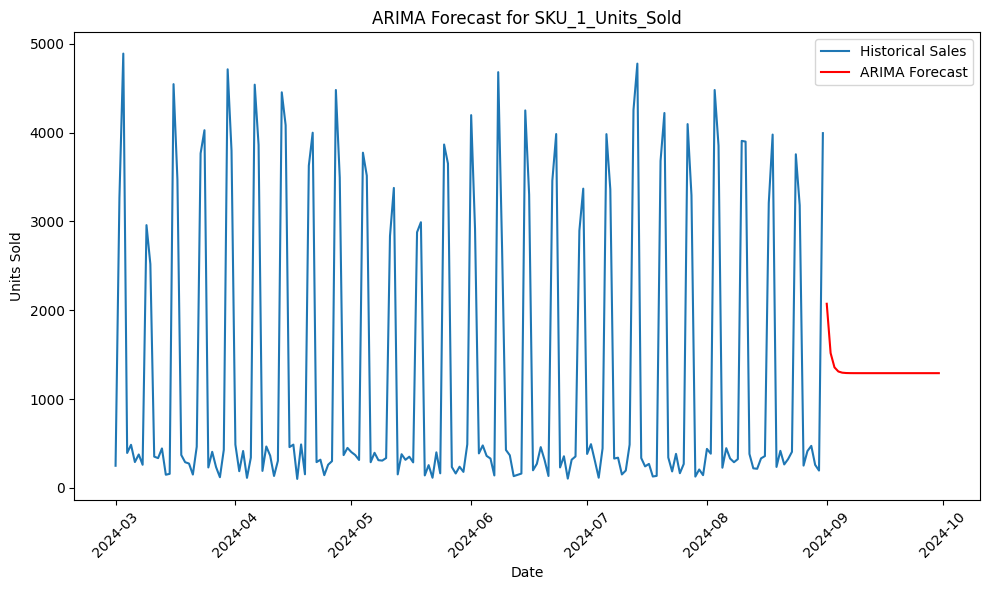

ARIMA Forecast for SKU_1_Units_Sold:
 2024-09-01    2073.422813
2024-09-02    1517.866699
2024-09-03    1357.247288
2024-09-04    1310.809863
2024-09-05    1297.384123
2024-09-06    1293.502545
2024-09-07    1292.380324
2024-09-08    1292.055873
2024-09-09    1291.962070
2024-09-10    1291.934950
2024-09-11    1291.927109
2024-09-12    1291.924842
2024-09-13    1291.924187
2024-09-14    1291.923998
2024-09-15    1291.923943
2024-09-16    1291.923927
2024-09-17    1291.923922
2024-09-18    1291.923921
2024-09-19    1291.923921
2024-09-20    1291.923921
2024-09-21    1291.923921
2024-09-22    1291.923921
2024-09-23    1291.923921
2024-09-24    1291.923921
2024-09-25    1291.923921
2024-09-26    1291.923921
2024-09-27    1291.923921
2024-09-28    1291.923921
2024-09-29    1291.923921
2024-09-30    1291.923921
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


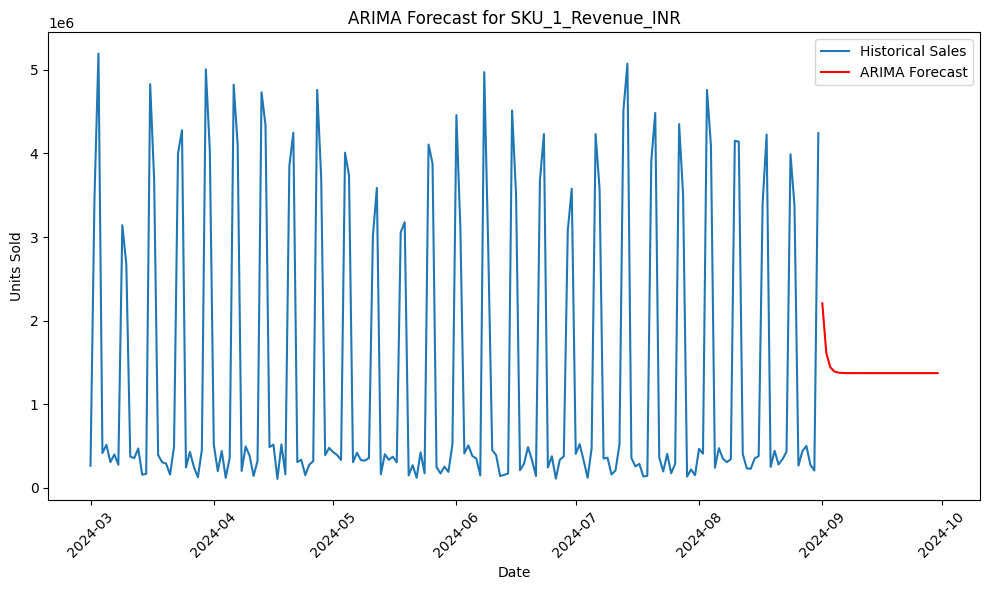

ARIMA Forecast for SKU_1_Revenue_INR:
 2024-09-01    2.207377e+06
2024-09-02    1.615225e+06
2024-09-03    1.442881e+06
2024-09-04    1.392721e+06
2024-09-05    1.378122e+06
2024-09-06    1.373873e+06
2024-09-07    1.372637e+06
2024-09-08    1.372277e+06
2024-09-09    1.372172e+06
2024-09-10    1.372141e+06
2024-09-11    1.372133e+06
2024-09-12    1.372130e+06
2024-09-13    1.372129e+06
2024-09-14    1.372129e+06
2024-09-15    1.372129e+06
2024-09-16    1.372129e+06
2024-09-17    1.372129e+06
2024-09-18    1.372129e+06
2024-09-19    1.372129e+06
2024-09-20    1.372129e+06
2024-09-21    1.372129e+06
2024-09-22    1.372129e+06
2024-09-23    1.372129e+06
2024-09-24    1.372129e+06
2024-09-25    1.372129e+06
2024-09-26    1.372129e+06
2024-09-27    1.372129e+06
2024-09-28    1.372129e+06
2024-09-29    1.372129e+06
2024-09-30    1.372129e+06
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


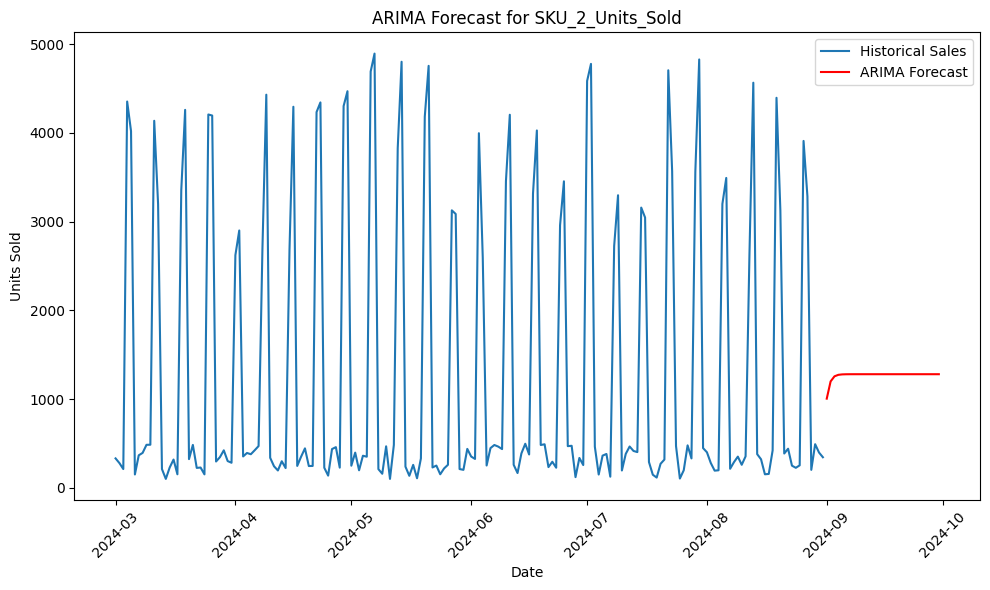

ARIMA Forecast for SKU_2_Units_Sold:
 2024-09-01    1005.207352
2024-09-02    1199.521689
2024-09-03    1256.712906
2024-09-04    1273.545607
2024-09-05    1278.499862
2024-09-06    1279.958014
2024-09-07    1280.387182
2024-09-08    1280.513496
2024-09-09    1280.550673
2024-09-10    1280.561615
2024-09-11    1280.564836
2024-09-12    1280.565784
2024-09-13    1280.566063
2024-09-14    1280.566145
2024-09-15    1280.566169
2024-09-16    1280.566176
2024-09-17    1280.566178
2024-09-18    1280.566179
2024-09-19    1280.566179
2024-09-20    1280.566179
2024-09-21    1280.566179
2024-09-22    1280.566179
2024-09-23    1280.566179
2024-09-24    1280.566179
2024-09-25    1280.566179
2024-09-26    1280.566179
2024-09-27    1280.566179
2024-09-28    1280.566179
2024-09-29    1280.566179
2024-09-30    1280.566179
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


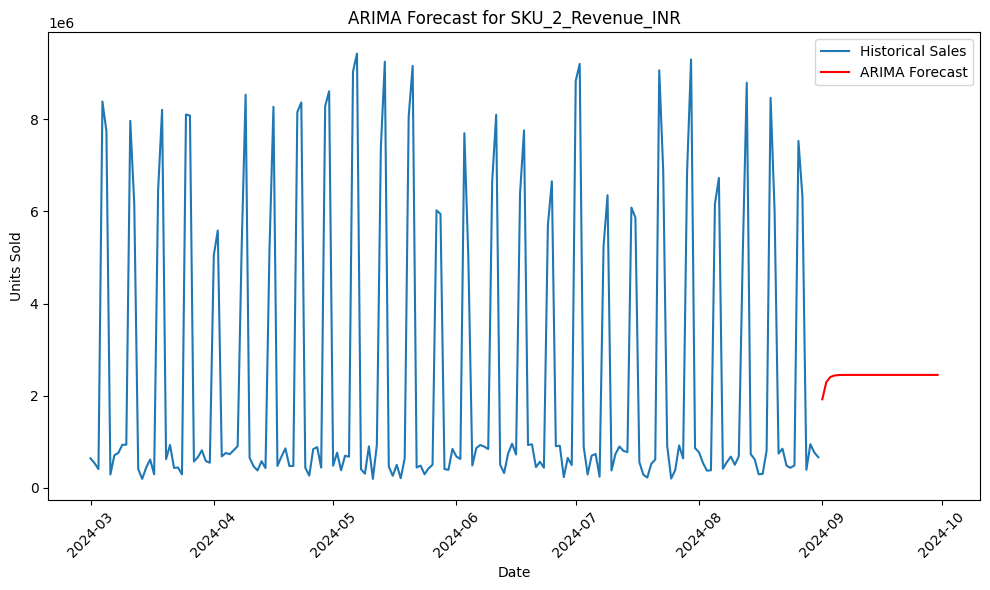

ARIMA Forecast for SKU_2_Revenue_INR:
 2024-09-01    1.921846e+06
2024-09-02    2.294358e+06
2024-09-03    2.404721e+06
2024-09-04    2.437418e+06
2024-09-05    2.447105e+06
2024-09-06    2.449975e+06
2024-09-07    2.450825e+06
2024-09-08    2.451077e+06
2024-09-09    2.451152e+06
2024-09-10    2.451174e+06
2024-09-11    2.451181e+06
2024-09-12    2.451183e+06
2024-09-13    2.451183e+06
2024-09-14    2.451183e+06
2024-09-15    2.451183e+06
2024-09-16    2.451183e+06
2024-09-17    2.451183e+06
2024-09-18    2.451183e+06
2024-09-19    2.451183e+06
2024-09-20    2.451183e+06
2024-09-21    2.451183e+06
2024-09-22    2.451183e+06
2024-09-23    2.451183e+06
2024-09-24    2.451183e+06
2024-09-25    2.451183e+06
2024-09-26    2.451183e+06
2024-09-27    2.451183e+06
2024-09-28    2.451183e+06
2024-09-29    2.451183e+06
2024-09-30    2.451183e+06
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


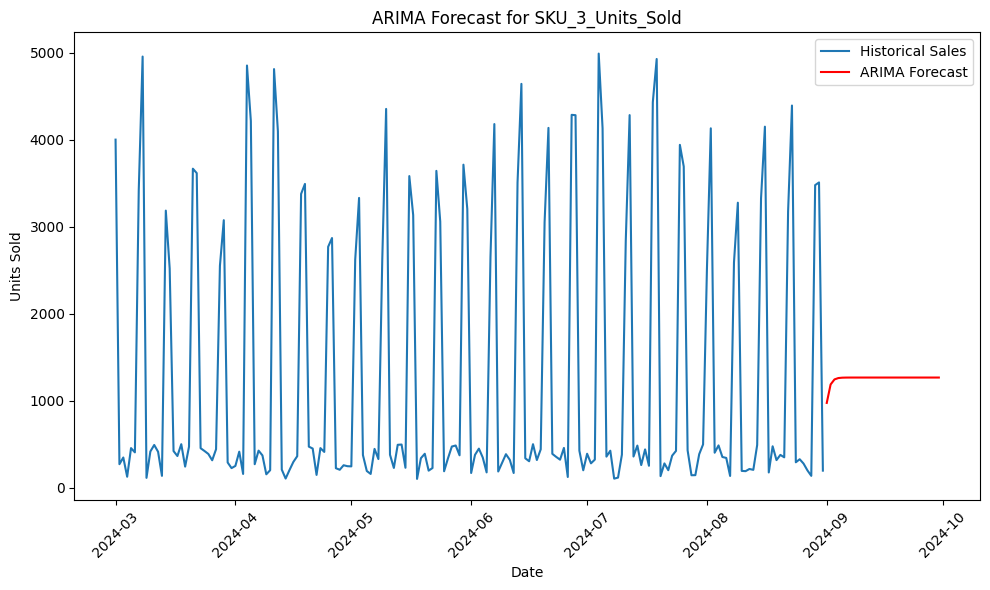

ARIMA Forecast for SKU_3_Units_Sold:
 2024-09-01     973.619663
2024-09-02    1185.734926
2024-09-03    1243.520373
2024-09-04    1259.262559
2024-09-05    1263.551120
2024-09-06    1264.719430
2024-09-07    1265.037706
2024-09-08    1265.124413
2024-09-09    1265.148034
2024-09-10    1265.154469
2024-09-11    1265.156222
2024-09-12    1265.156699
2024-09-13    1265.156829
2024-09-14    1265.156865
2024-09-15    1265.156874
2024-09-16    1265.156877
2024-09-17    1265.156878
2024-09-18    1265.156878
2024-09-19    1265.156878
2024-09-20    1265.156878
2024-09-21    1265.156878
2024-09-22    1265.156878
2024-09-23    1265.156878
2024-09-24    1265.156878
2024-09-25    1265.156878
2024-09-26    1265.156878
2024-09-27    1265.156878
2024-09-28    1265.156878
2024-09-29    1265.156878
2024-09-30    1265.156878
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


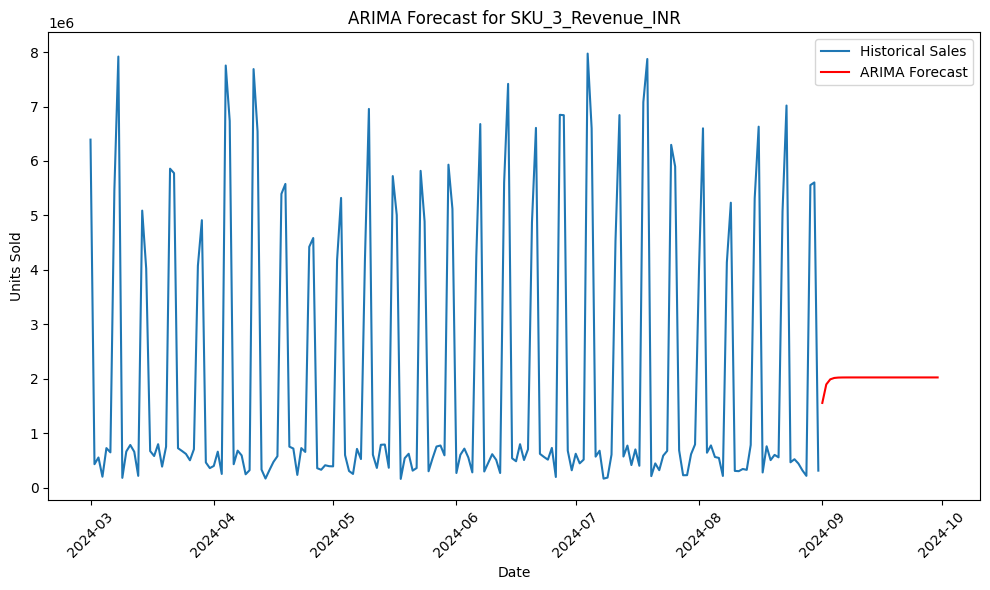

ARIMA Forecast for SKU_3_Revenue_INR:
 2024-09-01    1.555471e+06
2024-09-02    1.895616e+06
2024-09-03    1.988631e+06
2024-09-04    2.014067e+06
2024-09-05    2.021023e+06
2024-09-06    2.022925e+06
2024-09-07    2.023445e+06
2024-09-08    2.023587e+06
2024-09-09    2.023626e+06
2024-09-10    2.023637e+06
2024-09-11    2.023640e+06
2024-09-12    2.023641e+06
2024-09-13    2.023641e+06
2024-09-14    2.023641e+06
2024-09-15    2.023641e+06
2024-09-16    2.023641e+06
2024-09-17    2.023641e+06
2024-09-18    2.023641e+06
2024-09-19    2.023641e+06
2024-09-20    2.023641e+06
2024-09-21    2.023641e+06
2024-09-22    2.023641e+06
2024-09-23    2.023641e+06
2024-09-24    2.023641e+06
2024-09-25    2.023641e+06
2024-09-26    2.023641e+06
2024-09-27    2.023641e+06
2024-09-28    2.023641e+06
2024-09-29    2.023641e+06
2024-09-30    2.023641e+06
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


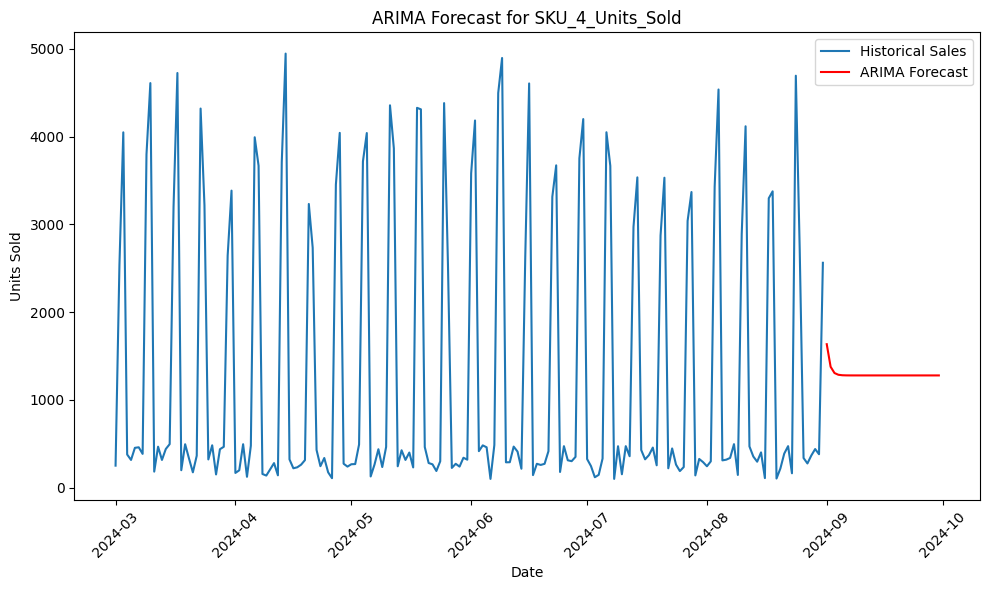

ARIMA Forecast for SKU_4_Units_Sold:
 2024-09-01    1634.517372
2024-09-02    1377.394445
2024-09-03    1306.113110
2024-09-04    1286.352022
2024-09-05    1280.873722
2024-09-06    1279.354991
2024-09-07    1278.933958
2024-09-08    1278.817236
2024-09-09    1278.784878
2024-09-10    1278.775907
2024-09-11    1278.773420
2024-09-12    1278.772731
2024-09-13    1278.772540
2024-09-14    1278.772487
2024-09-15    1278.772472
2024-09-16    1278.772468
2024-09-17    1278.772467
2024-09-18    1278.772467
2024-09-19    1278.772467
2024-09-20    1278.772467
2024-09-21    1278.772467
2024-09-22    1278.772467
2024-09-23    1278.772467
2024-09-24    1278.772467
2024-09-25    1278.772467
2024-09-26    1278.772467
2024-09-27    1278.772467
2024-09-28    1278.772467
2024-09-29    1278.772467
2024-09-30    1278.772467
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


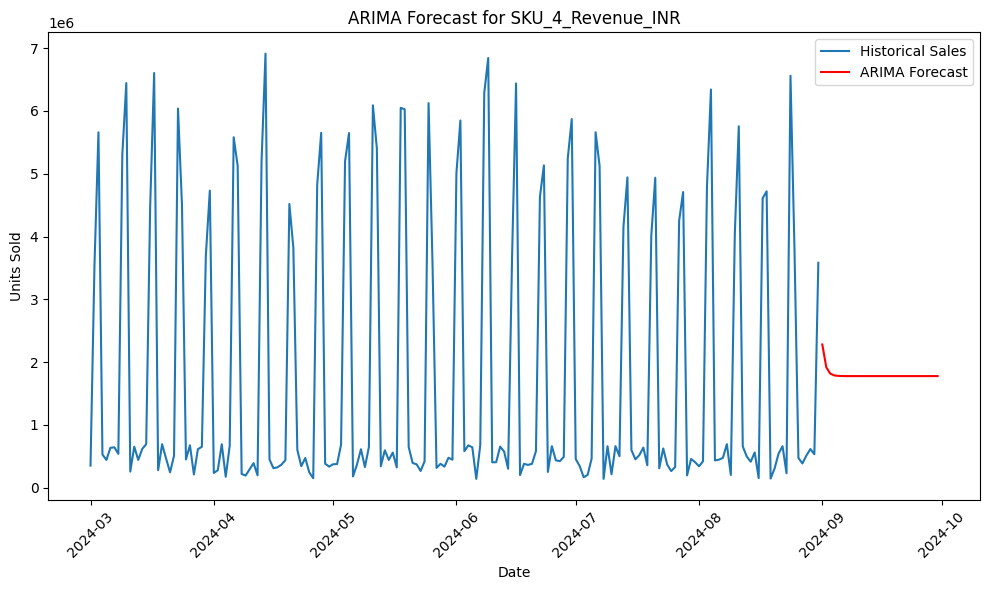

ARIMA Forecast for SKU_4_Revenue_INR:
 2024-09-01    2.280954e+06
2024-09-02    1.917788e+06
2024-09-03    1.816389e+06
2024-09-04    1.788077e+06
2024-09-05    1.780173e+06
2024-09-06    1.777965e+06
2024-09-07    1.777349e+06
2024-09-08    1.777177e+06
2024-09-09    1.777129e+06
2024-09-10    1.777116e+06
2024-09-11    1.777112e+06
2024-09-12    1.777111e+06
2024-09-13    1.777111e+06
2024-09-14    1.777111e+06
2024-09-15    1.777111e+06
2024-09-16    1.777111e+06
2024-09-17    1.777111e+06
2024-09-18    1.777111e+06
2024-09-19    1.777111e+06
2024-09-20    1.777111e+06
2024-09-21    1.777111e+06
2024-09-22    1.777111e+06
2024-09-23    1.777111e+06
2024-09-24    1.777111e+06
2024-09-25    1.777111e+06
2024-09-26    1.777111e+06
2024-09-27    1.777111e+06
2024-09-28    1.777111e+06
2024-09-29    1.777111e+06
2024-09-30    1.777111e+06
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


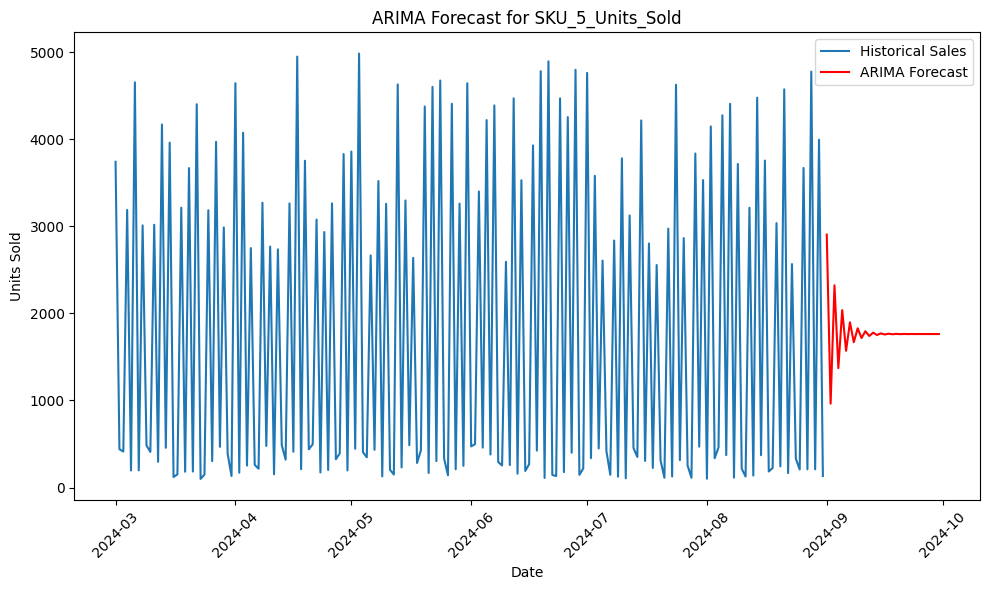

ARIMA Forecast for SKU_5_Units_Sold:
 2024-09-01    2904.100785
2024-09-02     963.931809
2024-09-03    2322.329048
2024-09-04    1371.255671
2024-09-05    2037.143780
2024-09-06    1570.926363
2024-09-07    1897.345587
2024-09-08    1668.805198
2024-09-09    1828.816330
2024-09-10    1716.785531
2024-09-11    1795.223198
2024-09-12    1740.305553
2024-09-13    1778.755800
2024-09-14    1751.835099
2024-09-15    1770.683461
2024-09-16    1757.486898
2024-09-17    1766.726389
2024-09-18    1760.257417
2024-09-19    1764.786627
2024-09-20    1761.615529
2024-09-21    1763.835754
2024-09-22    1762.281277
2024-09-23    1763.369634
2024-09-24    1762.607628
2024-09-25    1763.141142
2024-09-26    1762.767605
2024-09-27    1763.029135
2024-09-28    1762.846026
2024-09-29    1762.974228
2024-09-30    1762.884469
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


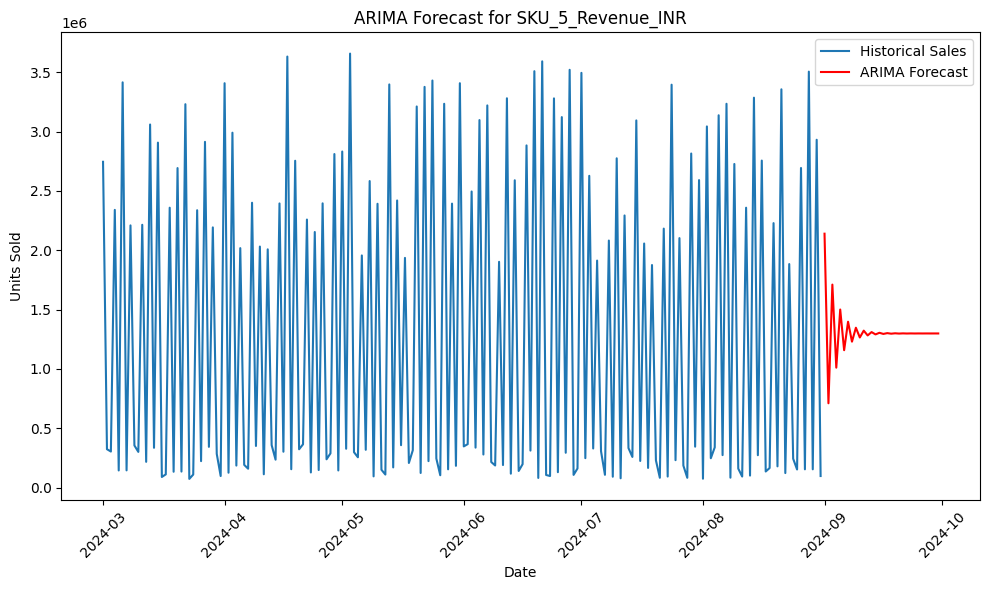

ARIMA Forecast for SKU_5_Revenue_INR:
 2024-09-01    2.139497e+06
2024-09-02    7.106040e+05
2024-09-03    1.710538e+06
2024-09-04    1.010788e+06
2024-09-05    1.500470e+06
2024-09-06    1.157793e+06
2024-09-07    1.397597e+06
2024-09-08    1.229783e+06
2024-09-09    1.347218e+06
2024-09-10    1.265038e+06
2024-09-11    1.322547e+06
2024-09-12    1.282302e+06
2024-09-13    1.310466e+06
2024-09-14    1.290757e+06
2024-09-15    1.304549e+06
2024-09-16    1.294897e+06
2024-09-17    1.301652e+06
2024-09-18    1.296925e+06
2024-09-19    1.300233e+06
2024-09-20    1.297918e+06
2024-09-21    1.299538e+06
2024-09-22    1.298404e+06
2024-09-23    1.299198e+06
2024-09-24    1.298642e+06
2024-09-25    1.299031e+06
2024-09-26    1.298759e+06
2024-09-27    1.298949e+06
2024-09-28    1.298816e+06
2024-09-29    1.298909e+06
2024-09-30    1.298844e+06
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


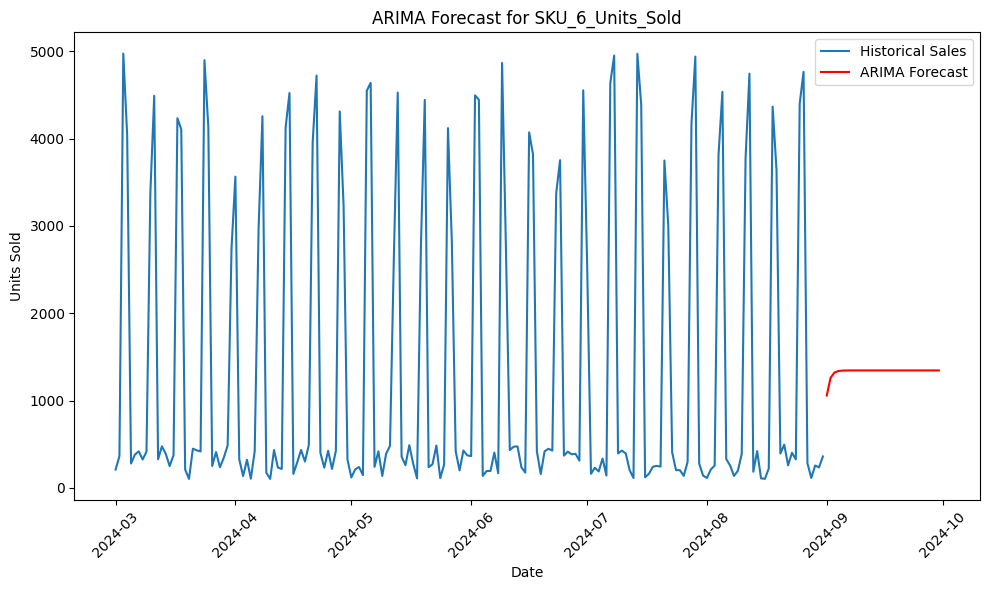

ARIMA Forecast for SKU_6_Units_Sold:
 2024-09-01    1057.766619
2024-09-02    1261.090443
2024-09-03    1320.337441
2024-09-04    1337.601560
2024-09-05    1342.632192
2024-09-06    1344.098079
2024-09-07    1344.525227
2024-09-08    1344.649695
2024-09-09    1344.685964
2024-09-10    1344.696532
2024-09-11    1344.699612
2024-09-12    1344.700509
2024-09-13    1344.700771
2024-09-14    1344.700847
2024-09-15    1344.700869
2024-09-16    1344.700876
2024-09-17    1344.700878
2024-09-18    1344.700878
2024-09-19    1344.700878
2024-09-20    1344.700878
2024-09-21    1344.700878
2024-09-22    1344.700878
2024-09-23    1344.700878
2024-09-24    1344.700878
2024-09-25    1344.700878
2024-09-26    1344.700878
2024-09-27    1344.700878
2024-09-28    1344.700878
2024-09-29    1344.700878
2024-09-30    1344.700878
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


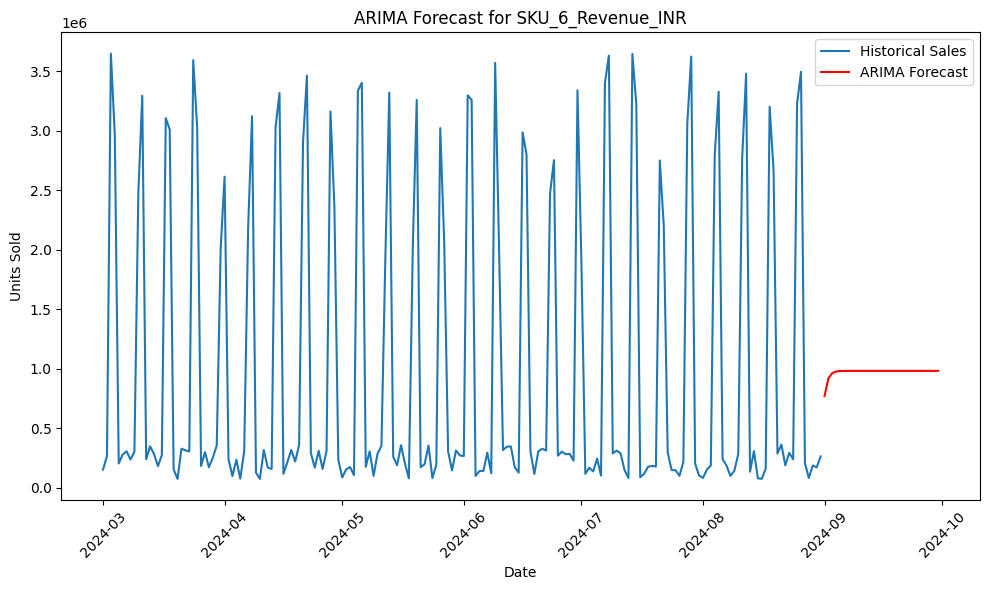

ARIMA Forecast for SKU_6_Revenue_INR:
 2024-09-01    772386.242593
2024-09-02    921422.721735
2024-09-03    965134.037729
2024-09-04    977954.248974
2024-09-05    981714.323743
2024-09-06    982817.126341
2024-09-07    983140.570327
2024-09-08    983235.434097
2024-09-09    983263.256951
2024-09-10    983271.417192
2024-09-11    983273.810531
2024-09-12    983274.512480
2024-09-13    983274.718357
2024-09-14    983274.778739
2024-09-15    983274.796448
2024-09-16    983274.801643
2024-09-17    983274.803166
2024-09-18    983274.803613
2024-09-19    983274.803744
2024-09-20    983274.803782
2024-09-21    983274.803793
2024-09-22    983274.803797
2024-09-23    983274.803798
2024-09-24    983274.803798
2024-09-25    983274.803798
2024-09-26    983274.803798
2024-09-27    983274.803798
2024-09-28    983274.803798
2024-09-29    983274.803798
2024-09-30    983274.803798
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


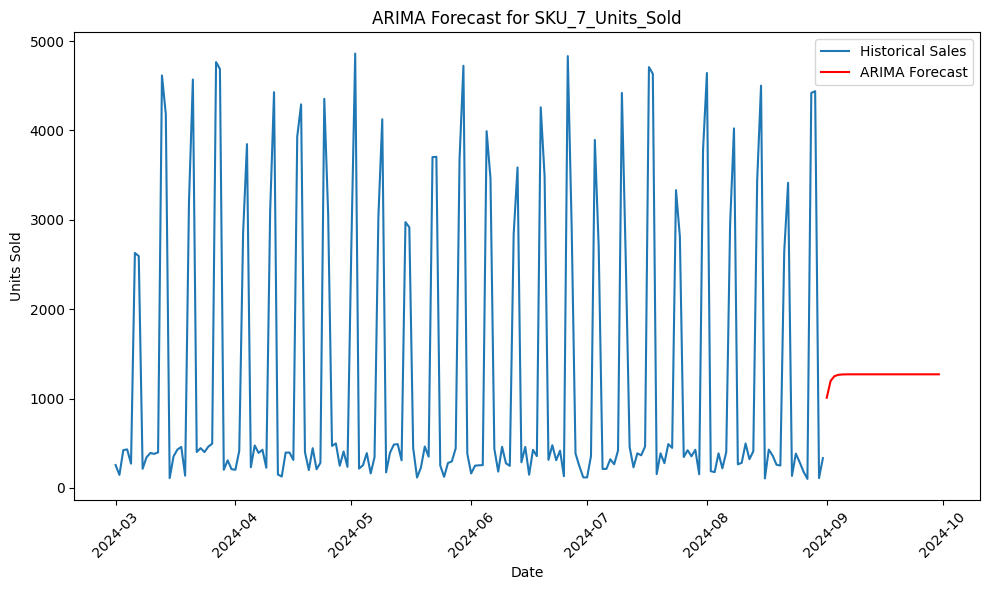

ARIMA Forecast for SKU_7_Units_Sold:
 2024-09-01    1008.944868
2024-09-02    1197.890119
2024-09-03    1250.705533
2024-09-04    1265.468899
2024-09-05    1269.595667
2024-09-06    1270.749213
2024-09-07    1271.071661
2024-09-08    1271.161794
2024-09-09    1271.186989
2024-09-10    1271.194031
2024-09-11    1271.196000
2024-09-12    1271.196550
2024-09-13    1271.196704
2024-09-14    1271.196747
2024-09-15    1271.196759
2024-09-16    1271.196762
2024-09-17    1271.196763
2024-09-18    1271.196764
2024-09-19    1271.196764
2024-09-20    1271.196764
2024-09-21    1271.196764
2024-09-22    1271.196764
2024-09-23    1271.196764
2024-09-24    1271.196764
2024-09-25    1271.196764
2024-09-26    1271.196764
2024-09-27    1271.196764
2024-09-28    1271.196764
2024-09-29    1271.196764
2024-09-30    1271.196764
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


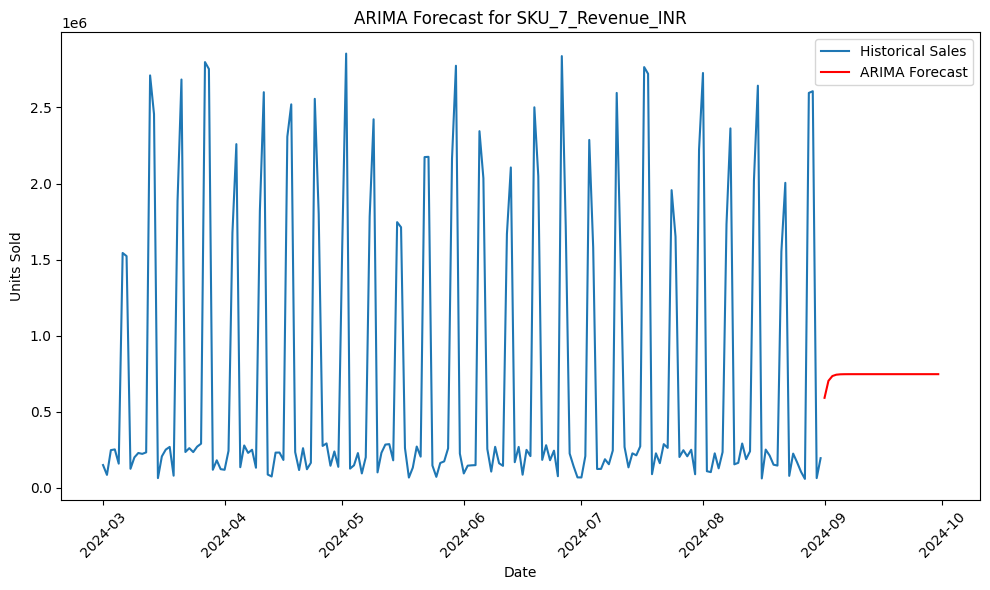

ARIMA Forecast for SKU_7_Revenue_INR:
 2024-09-01    591928.510483
2024-09-02    703583.903273
2024-09-03    735033.042898
2024-09-04    743891.086907
2024-09-05    746386.065931
2024-09-06    747088.808017
2024-09-07    747286.744126
2024-09-08    747342.495310
2024-09-09    747358.198329
2024-09-10    747362.621281
2024-09-11    747363.867061
2024-09-12    747364.217950
2024-09-13    747364.316783
2024-09-14    747364.344620
2024-09-15    747364.352461
2024-09-16    747364.354669
2024-09-17    747364.355291
2024-09-18    747364.355466
2024-09-19    747364.355516
2024-09-20    747364.355530
2024-09-21    747364.355534
2024-09-22    747364.355535
2024-09-23    747364.355535
2024-09-24    747364.355535
2024-09-25    747364.355535
2024-09-26    747364.355535
2024-09-27    747364.355535
2024-09-28    747364.355535
2024-09-29    747364.355535
2024-09-30    747364.355535
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


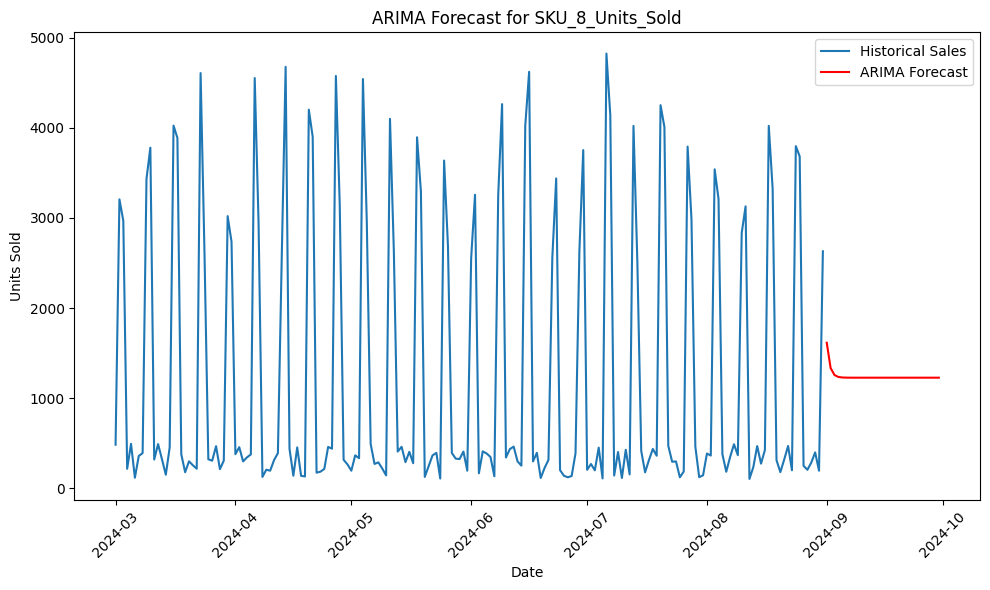

ARIMA Forecast for SKU_8_Units_Sold:
 2024-09-01    1615.832694
2024-09-02    1335.453394
2024-09-03    1257.939012
2024-09-04    1236.509187
2024-09-05    1230.584643
2024-09-06    1228.946728
2024-09-07    1228.493906
2024-09-08    1228.368717
2024-09-09    1228.334108
2024-09-10    1228.324539
2024-09-11    1228.321894
2024-09-12    1228.321163
2024-09-13    1228.320960
2024-09-14    1228.320905
2024-09-15    1228.320889
2024-09-16    1228.320885
2024-09-17    1228.320884
2024-09-18    1228.320883
2024-09-19    1228.320883
2024-09-20    1228.320883
2024-09-21    1228.320883
2024-09-22    1228.320883
2024-09-23    1228.320883
2024-09-24    1228.320883
2024-09-25    1228.320883
2024-09-26    1228.320883
2024-09-27    1228.320883
2024-09-28    1228.320883
2024-09-29    1228.320883
2024-09-30    1228.320883
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


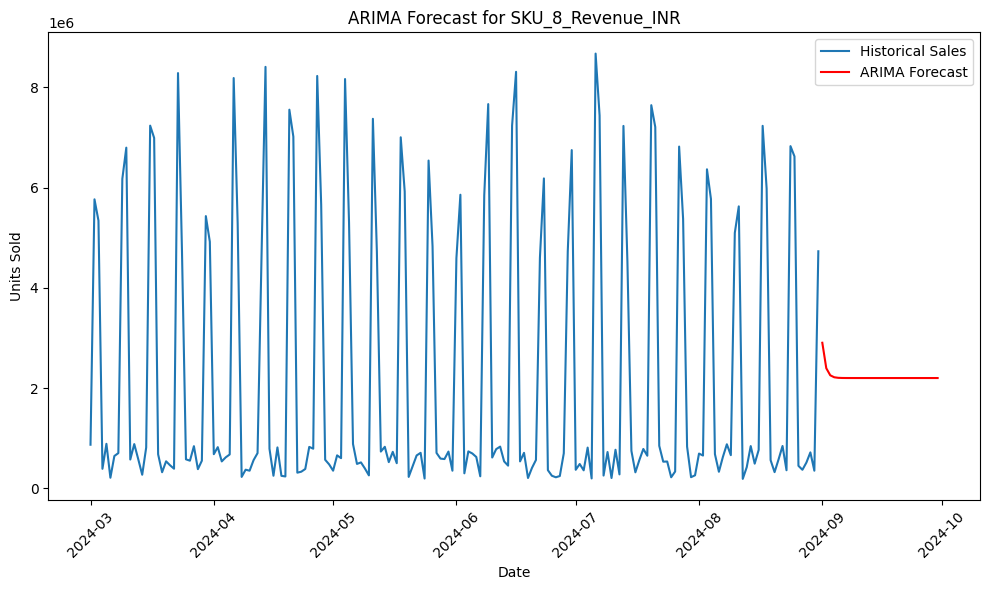

ARIMA Forecast for SKU_8_Revenue_INR:
 2024-09-01    2.906876e+06
2024-09-02    2.398979e+06
2024-09-03    2.257646e+06
2024-09-04    2.218317e+06
2024-09-05    2.207373e+06
2024-09-06    2.204328e+06
2024-09-07    2.203480e+06
2024-09-08    2.203244e+06
2024-09-09    2.203179e+06
2024-09-10    2.203161e+06
2024-09-11    2.203155e+06
2024-09-12    2.203154e+06
2024-09-13    2.203154e+06
2024-09-14    2.203154e+06
2024-09-15    2.203154e+06
2024-09-16    2.203153e+06
2024-09-17    2.203153e+06
2024-09-18    2.203153e+06
2024-09-19    2.203153e+06
2024-09-20    2.203153e+06
2024-09-21    2.203153e+06
2024-09-22    2.203153e+06
2024-09-23    2.203153e+06
2024-09-24    2.203153e+06
2024-09-25    2.203153e+06
2024-09-26    2.203153e+06
2024-09-27    2.203153e+06
2024-09-28    2.203153e+06
2024-09-29    2.203153e+06
2024-09-30    2.203153e+06
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


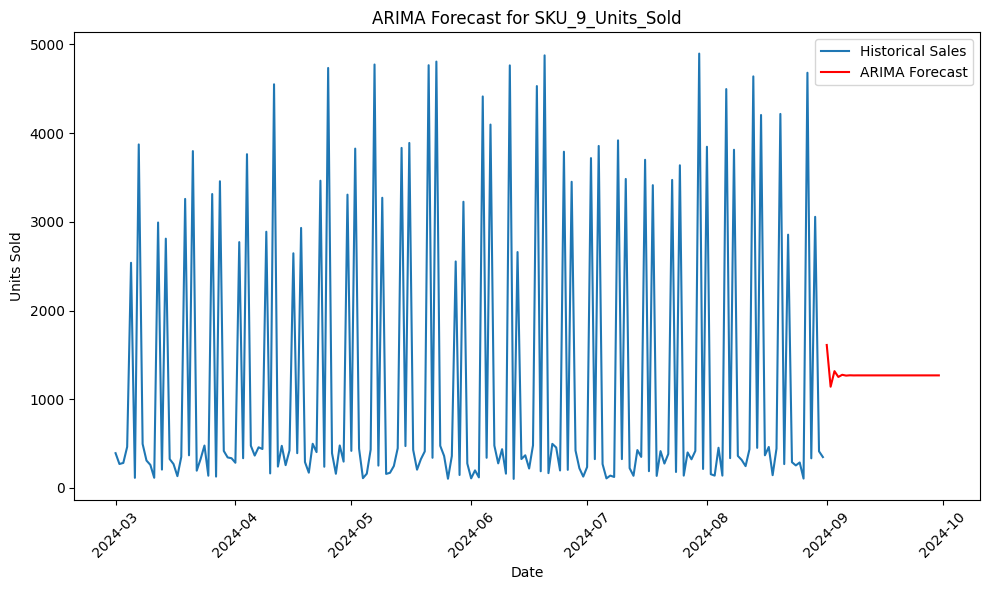

ARIMA Forecast for SKU_9_Units_Sold:
 2024-09-01    1611.598222
2024-09-02    1141.288446
2024-09-03    1316.337193
2024-09-04    1251.184255
2024-09-05    1275.434102
2024-09-06    1266.408337
2024-09-07    1269.767716
2024-09-08    1268.517359
2024-09-09    1268.982741
2024-09-10    1268.809526
2024-09-11    1268.873996
2024-09-12    1268.850001
2024-09-13    1268.858932
2024-09-14    1268.855608
2024-09-15    1268.856845
2024-09-16    1268.856384
2024-09-17    1268.856556
2024-09-18    1268.856492
2024-09-19    1268.856516
2024-09-20    1268.856507
2024-09-21    1268.856510
2024-09-22    1268.856509
2024-09-23    1268.856510
2024-09-24    1268.856509
2024-09-25    1268.856509
2024-09-26    1268.856509
2024-09-27    1268.856509
2024-09-28    1268.856509
2024-09-29    1268.856509
2024-09-30    1268.856509
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


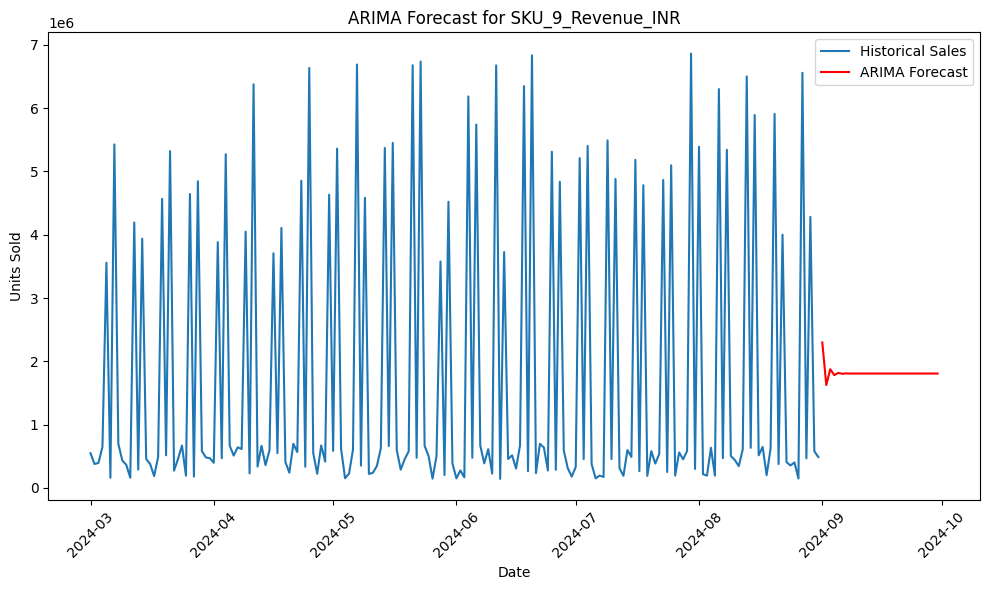

ARIMA Forecast for SKU_9_Revenue_INR:
 2024-09-01    2.298975e+06
2024-09-02    1.625319e+06
2024-09-03    1.875879e+06
2024-09-04    1.782685e+06
2024-09-05    1.817348e+06
2024-09-06    1.804456e+06
2024-09-07    1.809251e+06
2024-09-08    1.807467e+06
2024-09-09    1.808131e+06
2024-09-10    1.807884e+06
2024-09-11    1.807976e+06
2024-09-12    1.807942e+06
2024-09-13    1.807954e+06
2024-09-14    1.807950e+06
2024-09-15    1.807951e+06
2024-09-16    1.807951e+06
2024-09-17    1.807951e+06
2024-09-18    1.807951e+06
2024-09-19    1.807951e+06
2024-09-20    1.807951e+06
2024-09-21    1.807951e+06
2024-09-22    1.807951e+06
2024-09-23    1.807951e+06
2024-09-24    1.807951e+06
2024-09-25    1.807951e+06
2024-09-26    1.807951e+06
2024-09-27    1.807951e+06
2024-09-28    1.807951e+06
2024-09-29    1.807951e+06
2024-09-30    1.807951e+06
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


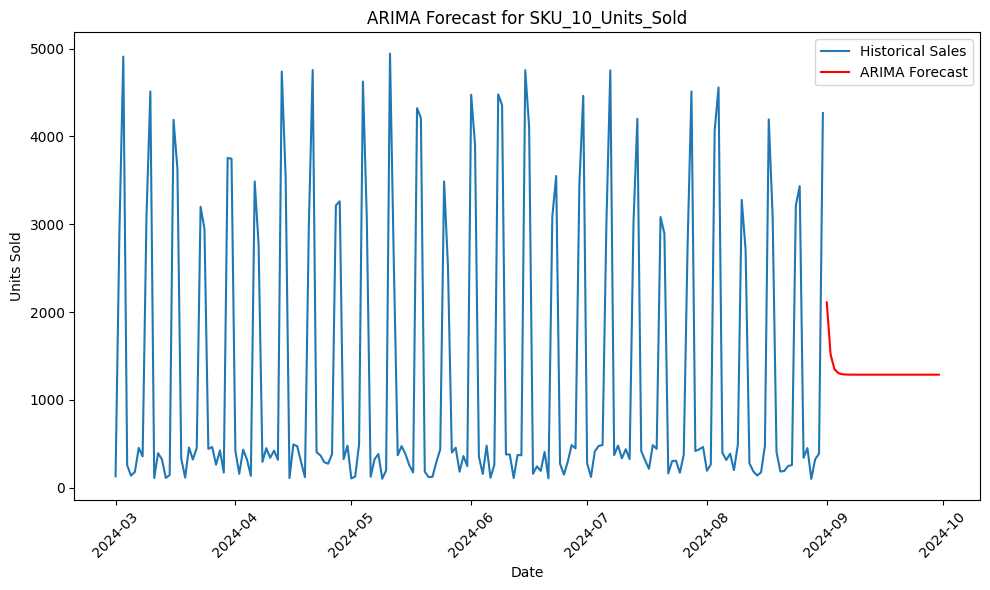

ARIMA Forecast for SKU_10_Units_Sold:
 2024-09-01    2111.297070
2024-09-02    1515.368169
2024-09-03    1350.704204
2024-09-04    1305.205116
2024-09-05    1292.633046
2024-09-06    1289.159197
2024-09-07    1288.199321
2024-09-08    1287.934093
2024-09-09    1287.860807
2024-09-10    1287.840557
2024-09-11    1287.834961
2024-09-12    1287.833415
2024-09-13    1287.832988
2024-09-14    1287.832870
2024-09-15    1287.832837
2024-09-16    1287.832828
2024-09-17    1287.832826
2024-09-18    1287.832825
2024-09-19    1287.832825
2024-09-20    1287.832825
2024-09-21    1287.832825
2024-09-22    1287.832825
2024-09-23    1287.832825
2024-09-24    1287.832825
2024-09-25    1287.832825
2024-09-26    1287.832825
2024-09-27    1287.832825
2024-09-28    1287.832825
2024-09-29    1287.832825
2024-09-30    1287.832825
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


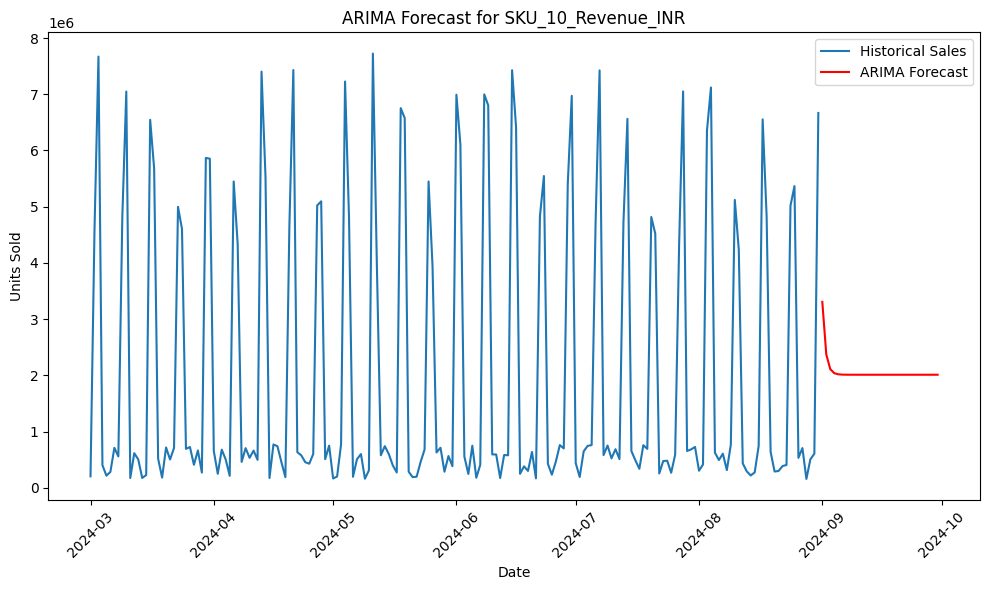

ARIMA Forecast for SKU_10_Revenue_INR:
 2024-09-01    3.306937e+06
2024-09-02    2.371553e+06
2024-09-03    2.111165e+06
2024-09-04    2.038679e+06
2024-09-05    2.018501e+06
2024-09-06    2.012883e+06
2024-09-07    2.011320e+06
2024-09-08    2.010885e+06
2024-09-09    2.010763e+06
2024-09-10    2.010730e+06
2024-09-11    2.010720e+06
2024-09-12    2.010718e+06
2024-09-13    2.010717e+06
2024-09-14    2.010717e+06
2024-09-15    2.010717e+06
2024-09-16    2.010717e+06
2024-09-17    2.010717e+06
2024-09-18    2.010717e+06
2024-09-19    2.010717e+06
2024-09-20    2.010717e+06
2024-09-21    2.010717e+06
2024-09-22    2.010717e+06
2024-09-23    2.010717e+06
2024-09-24    2.010717e+06
2024-09-25    2.010717e+06
2024-09-26    2.010717e+06
2024-09-27    2.010717e+06
2024-09-28    2.010717e+06
2024-09-29    2.010717e+06
2024-09-30    2.010717e+06
Freq: D, Name: predicted_mean, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def forecast_sku_sales(data, sku, forecast_steps=30, event_dates=None, event_esm=None):
    """
    Forecast sales for a given SKU using ARIMA, SARIMA, and Holt-Winters models, factoring in ESM.
    """
    # Check for sufficient variation
    if len(data[sku].unique()) <= 1:
        print(f"Insufficient variation in {sku} to perform forecasting.")
        return

    # Ensure the date is the index (skip setting if already set)
    if not isinstance(data.index, pd.DatetimeIndex):
        data.set_index('Date', inplace=True)

    # Prepare the forecasting index
    last_date = data.index.max()
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

    # ARIMA Model
    try:
        arima_model = ARIMA(data[sku], order=(1, 1, 1))
        arima_fit = arima_model.fit()
        forecast_arima = arima_fit.forecast(steps=forecast_steps)

        # Convert forecast to a Series with the forecast index
        forecast_arima_series = pd.Series(forecast_arima, index=forecast_index)

        # Adjust forecast based on ESM
        if event_dates and event_esm:
            for date, esm in zip(event_dates, event_esm):
                if pd.to_datetime(date) in forecast_arima_series.index:
                    forecast_arima_series[pd.to_datetime(date)] *= esm

        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data[sku], label='Historical Sales')
        plt.plot(forecast_arima_series.index, forecast_arima_series, label='ARIMA Forecast', color='red')
        plt.title(f'ARIMA Forecast for {sku}')
        plt.xlabel('Date')
        plt.ylabel('Units Sold')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"ARIMA Forecast for {sku}:\n", forecast_arima_series)
    except Exception as e:
        print(f"ARIMA model failed for {sku}: {e}")

    # Repeat similar logic for SARIMA and Holt-Winters models...
    # (You can adapt the same logic for SARIMA and Holt-Winters forecasting below)

# Example usage for all SKUs
sku_columns = [col for col in data.columns if 'SKU' in col]  # Get SKU columns dynamically
event_dates = []  # Populate this list with user input dates for events
event_esm = []   # Populate this list with the corresponding ESM values
for sku in sku_columns:
    forecast_sku_sales(data, sku, event_dates=event_dates, event_esm=event_esm)


Available SKUs for forecasting: ['SKU_1_Units_Sold', 'SKU_2_Units_Sold', 'SKU_3_Units_Sold', 'SKU_4_Units_Sold', 'SKU_5_Units_Sold', 'SKU_6_Units_Sold', 'SKU_7_Units_Sold', 'SKU_8_Units_Sold', 'SKU_9_Units_Sold', 'SKU_10_Units_Sold']
Which SKU do you want to forecast? 5
Starting forecast for SKU: SKU_5_Units_Sold
Please enter the date range for upcoming events for SKU_5_Units_Sold:
Enter start date (YYYY-MM-DD): 2024-09-08
Enter end date (YYYY-MM-DD): 2024-09-10
Enter the type of Day (FSMS, BAU, MDS, MBS): MDS


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Adjusted forecast for 2024-09-08: Original = 281.0462661433968, ESM = 3.3, Adjusted = 927.4526782732094, Percentage Change = 230.00%
Adjusted forecast for 2024-09-09: Original = 3634.1354795788184, ESM = 3.3, Adjusted = 11992.6470826101, Percentage Change = 230.00%
Adjusted forecast for 2024-09-10: Original = 306.77431033857056, ESM = 3.3, Adjusted = 1012.3552241172828, Percentage Change = 230.00%


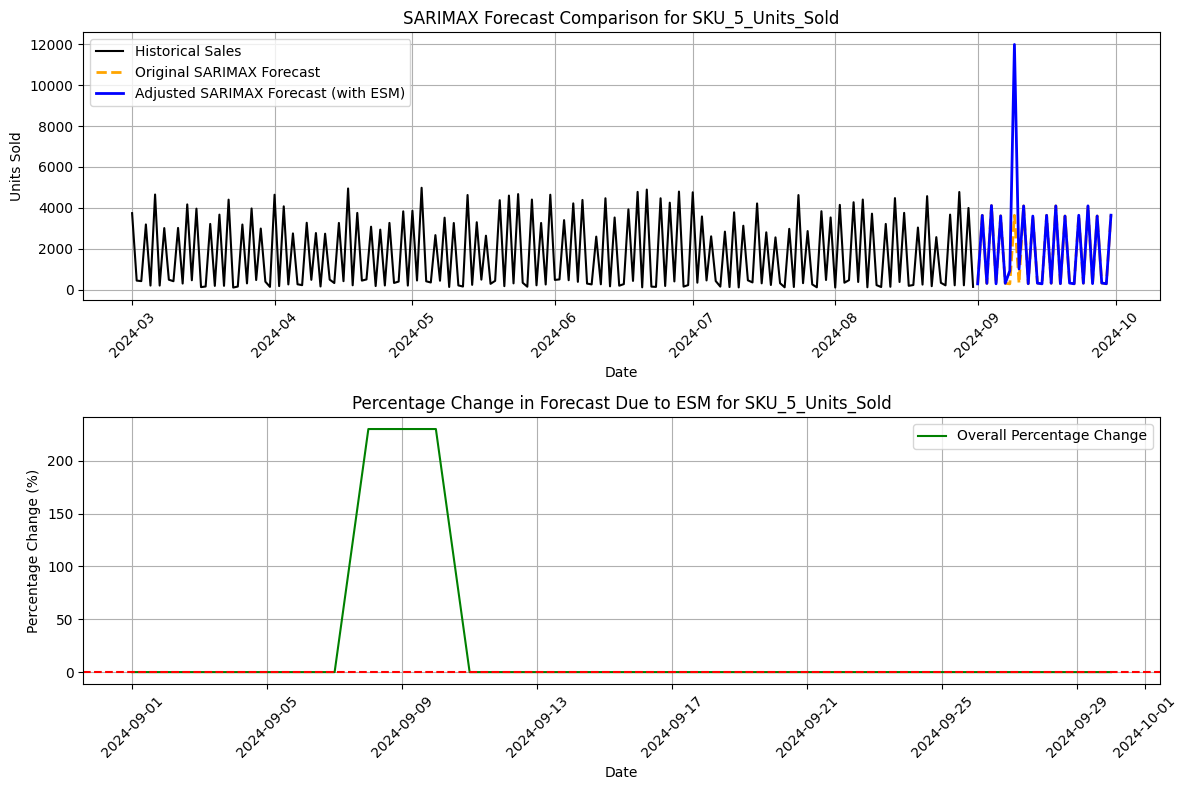

SARIMAX Original Forecast for SKU_5_Units_Sold:
 2024-09-01     280.836513
2024-09-02    3633.159147
2024-09-03     301.808634
2024-09-04    4113.308587
2024-09-05     283.840545
2024-09-06    3608.411454
2024-09-07     308.015087
2024-09-08     281.046266
2024-09-09    3634.135480
2024-09-10     306.774310
2024-09-11    4094.147810
2024-09-12     288.233066
2024-09-13    3598.124068
2024-09-14     315.647440
2024-09-15     283.080968
2024-09-16    3636.194729
2024-09-17     308.961307
2024-09-18    4095.562224
2024-09-19     290.401709
2024-09-20    3599.822628
2024-09-21     317.919829
2024-09-22     285.174108
2024-09-23    3638.288655
2024-09-24     311.059324
2024-09-25    4097.635502
2024-09-26     292.499138
2024-09-27    3601.905005
2024-09-28     320.020581
2024-09-29     287.269120
2024-09-30    3640.383692
Freq: D, Name: predicted_mean, dtype: float64
SARIMAX Adjusted Forecast for SKU_5_Units_Sold:
 2024-09-01      280.836513
2024-09-02     3633.159147
2024-09-03      301.80

In [10]:
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

@dataclass
class ESMValues:
    FSMS: float
    BAU: float
    MDS: float
    MBS: float

# Define the ESM mapping for 10 SKUs using the data class
esm_mapping_per_sku = {
    "SKU_1_Units_Sold": ESMValues(FSMS=2.5, BAU=1.0, MDS=3.0, MBS=2.0),
    "SKU_2_Units_Sold": ESMValues(FSMS=2.8, BAU=1.0, MDS=3.2, MBS=1.8),
    "SKU_3_Units_Sold": ESMValues(FSMS=3.0, BAU=1.1, MDS=2.5, MBS=2.2),
    "SKU_4_Units_Sold": ESMValues(FSMS=2.6, BAU=1.0, MDS=3.1, MBS=2.3),
    "SKU_5_Units_Sold": ESMValues(FSMS=2.9, BAU=1.2, MDS=3.3, MBS=1.9),
    "SKU_6_Units_Sold": ESMValues(FSMS=2.4, BAU=1.0, MDS=2.8, MBS=2.1),
    "SKU_7_Units_Sold": ESMValues(FSMS=3.1, BAU=1.3, MDS=3.5, MBS=2.4),
    "SKU_8_Units_Sold": ESMValues(FSMS=2.7, BAU=1.0, MDS=2.6, MBS=2.0),
    "SKU_9_Units_Sold": ESMValues(FSMS=3.2, BAU=1.4, MDS=3.4, MBS=2.2),
    "SKU_10_Units_Sold": ESMValues(FSMS=2.5, BAU=1.0, MDS=3.0, MBS=2.5)
}

def get_event_dates_and_esm(sku):
    """
    Collects event date ranges and their corresponding ESM values from the user via console input.
    Returns a list of event dates and a list of corresponding ESM values.
    """
    event_dates = []
    event_esm = []

    # Check if the SKU exists in the mapping
    if sku not in esm_mapping_per_sku:
        print(f"No ESM mapping found for SKU: {sku}")
        return [], []

    print(f"Please enter the date range for upcoming events for {sku}:")
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")
    day_type = input("Enter the type of Day (FSMS, BAU, MDS, MBS): ").strip()

    try:
        # Validate the dates
        start_dt = pd.to_datetime(start_date)
        end_dt = pd.to_datetime(end_date)

        # Check if the day type is valid
        if day_type not in esm_mapping_per_sku[sku].__dict__:
            print("Invalid day type. Please enter one of the following: FSMS, BAU, MDS, MBS.")
            return [], []

        # Generate date range and assign corresponding ESM
        for single_date in pd.date_range(start=start_dt, end=end_dt):
            event_dates.append(single_date)
            event_esm.append(getattr(esm_mapping_per_sku[sku], day_type))  # Get ESM for this SKU and day type

    except ValueError:
        print("Please enter valid dates in YYYY-MM-DD format.")

    return event_dates, event_esm

def forecast_sku_sales_sarimax(data, sku, forecast_steps=30):
    """
    Forecast sales for a given SKU using SARIMAX, factoring in ESM as an exogenous variable.
    """
    # Check for sufficient variation
    if len(data[sku].unique()) <= 1:
        print(f"Insufficient variation in {sku} to perform forecasting.")
        return

    print(f"Starting forecast for SKU: {sku}")

    # Ensure the date is the index (skip setting if already set)
    if not isinstance(data.index, pd.DatetimeIndex):
        data.set_index('Date', inplace=True)

    # Prepare the forecasting index
    last_date = data.index.max()
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

    # User Input for Events and ESM
    event_dates, event_esm = get_event_dates_and_esm(sku)

    # Prepare the exogenous variable (ESM) for forecasting
    exog_forecast = [1.0] * forecast_steps  # Default ESM value for forecast period
    for date_dt, esm in zip(event_dates, event_esm):
        # Check if the date is within the forecast period
        if date_dt in forecast_index:
            index_position = (forecast_index.get_loc(date_dt))
            exog_forecast[index_position] = esm  # Set ESM value for this date

    # SARIMAX Model
    try:
        sarimax_model = SARIMAX(data[sku], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
        sarimax_fit = sarimax_model.fit(disp=False)
        forecast_sarimax = sarimax_fit.forecast(steps=forecast_steps, exog=exog_forecast)  # Use the ESM for forecast

        # Convert forecast to a Series with the forecast index
        forecast_sarimax_series = pd.Series(forecast_sarimax, index=forecast_index)
        original_forecast_series = forecast_sarimax_series.copy()

        # Adjust forecast based on ESM for visualization
        if event_dates and event_esm:
            for date_dt, esm in zip(event_dates, event_esm):
                if date_dt in forecast_sarimax_series.index:
                    original_value = original_forecast_series[date_dt]
                    adjusted_value = original_value * esm
                    percentage_change = ((adjusted_value - original_value) / original_value) * 100

                    print(f"Adjusted forecast for {date_dt.date()}: Original = {original_value}, ESM = {esm}, Adjusted = {adjusted_value}, Percentage Change = {percentage_change:.2f}%")

                    # Update the forecast_sarimax_series with the adjusted value
                    forecast_sarimax_series[date_dt] = adjusted_value

        # Calculate overall percentage change
        overall_percentage_change = ((forecast_sarimax_series - original_forecast_series) / original_forecast_series) * 100

        # Plot both forecasts and percentage change for comparison
        plt.figure(figsize=(12, 8))

        # Plot original and adjusted forecasts
        plt.subplot(2, 1, 1)
        plt.plot(data.index, data[sku], label='Historical Sales', color='black')
        plt.plot(original_forecast_series.index, original_forecast_series,
                 label='Original SARIMAX Forecast', linestyle='--', color='orange', linewidth=2)
        plt.plot(forecast_sarimax_series.index, forecast_sarimax_series,
                 label='Adjusted SARIMAX Forecast (with ESM)', color='blue', linewidth=2)
        plt.title(f'SARIMAX Forecast Comparison for {sku}')
        plt.xlabel('Date')
        plt.ylabel('Units Sold')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)

        # Plot percentage change
        plt.subplot(2, 1, 2)
        plt.plot(overall_percentage_change.index, overall_percentage_change, label='Overall Percentage Change', color='green')
        plt.axhline(0, color='red', linestyle='--')  # Line at zero for reference
        plt.title(f'Percentage Change in Forecast Due to ESM for {sku}')
        plt.xlabel('Date')
        plt.ylabel('Percentage Change (%)')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        print(f"SARIMAX Original Forecast for {sku}:\n", original_forecast_series)
        print(f"SARIMAX Adjusted Forecast for {sku}:\n", forecast_sarimax_series)
    except Exception as e:
        print(f"SARIMAX model failed for {sku}: {e}")


available_skus = list(esm_mapping_per_sku.keys())
print("Available SKUs for forecasting:", available_skus)
ssku = input("Which SKU do you want to forecast? ")
selected_sku = "SKU_"+ssku+"_Units_"+"Sold"
if selected_sku in available_skus:
    forecast_sku_sales_sarimax(data, selected_sku)

else:
    print("Invalid SKU selected.")





Available SKUs for forecasting: ['SKU_1_Units_Sold', 'SKU_2_Units_Sold', 'SKU_3_Units_Sold', 'SKU_4_Units_Sold', 'SKU_5_Units_Sold', 'SKU_6_Units_Sold', 'SKU_7_Units_Sold', 'SKU_8_Units_Sold', 'SKU_9_Units_Sold', 'SKU_10_Units_Sold']
Which SKU do you want to forecast? 5
Please enter the date range for upcoming events for SKU_5_Units_Sold:
Enter start date (YYYY-MM-DD): 2024-09-10
Enter end date (YYYY-MM-DD): 2024-09-17
Enter the type of Day (FSMS, BAU, MDS, MBS): MBS
Starting Holt-Winters forecast for SKU: SKU_5_Units_Sold
Adjusted forecast for 2024-09-10: Original = 317.10803000474516, ESM = 1.9, Adjusted = 602.5052570090157, Percentage Change = 90.00%
Adjusted forecast for 2024-09-11: Original = 4148.129758648175, ESM = 1.9, Adjusted = 7881.446541431532, Percentage Change = 90.00%
Adjusted forecast for 2024-09-12: Original = 383.87474965495153, ESM = 1.9, Adjusted = 729.3620243444079, Percentage Change = 90.00%
Adjusted forecast for 2024-09-13: Original = 3637.8190876362305, ESM = 1.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


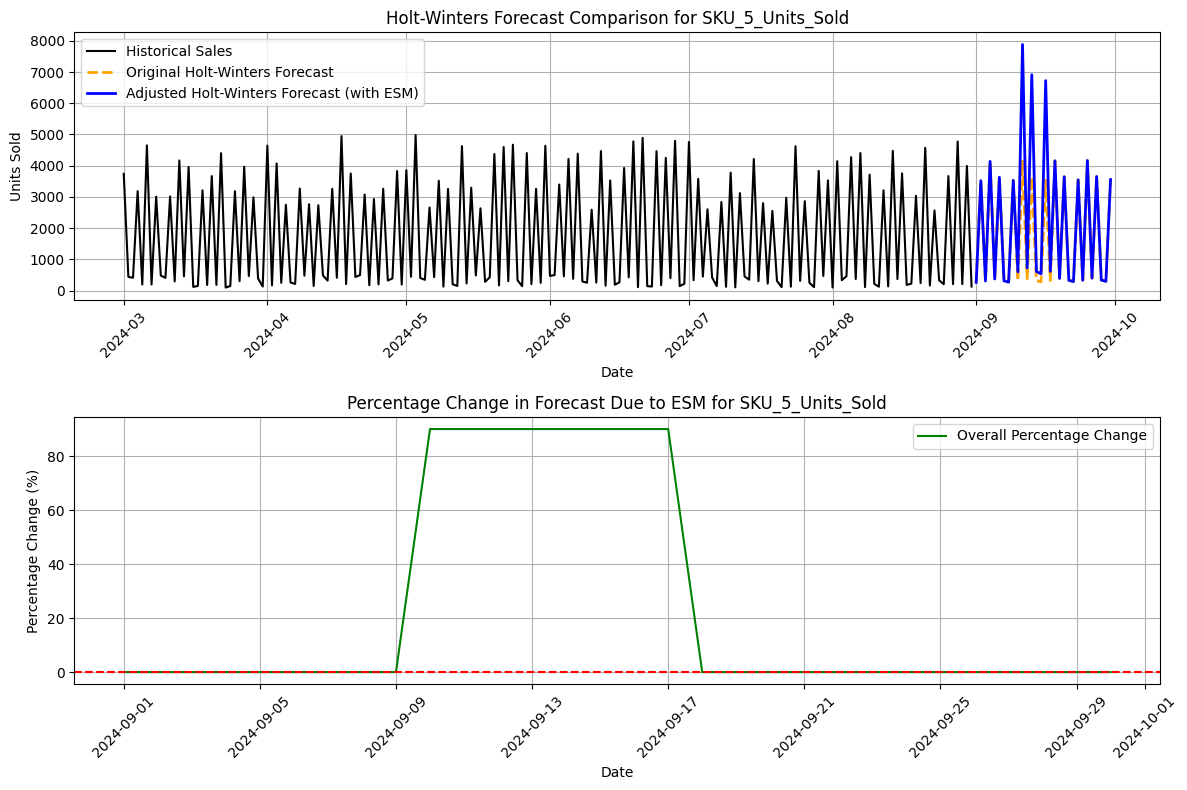

Holt-Winters Original Forecast for SKU_5_Units_Sold:
 2024-09-01     266.506463
2024-09-02    3521.636332
2024-09-03     308.491091
2024-09-04    4139.512819
2024-09-05     375.257810
2024-09-06    3629.202148
2024-09-07     314.690219
2024-09-08     275.123402
2024-09-09    3530.253271
2024-09-10     317.108030
2024-09-11    4148.129759
2024-09-12     383.874750
2024-09-13    3637.819088
2024-09-14     323.307158
2024-09-15     283.740341
2024-09-16    3538.870210
2024-09-17     325.724969
2024-09-18    4156.746698
2024-09-19     392.491689
2024-09-20    3646.436027
2024-09-21     331.924097
2024-09-22     292.357280
2024-09-23    3547.487150
2024-09-24     334.341908
2024-09-25    4165.363637
2024-09-26     401.108628
2024-09-27    3655.052966
2024-09-28     340.541036
2024-09-29     300.974219
2024-09-30    3556.104089
Freq: D, dtype: float64
Holt-Winters Adjusted Forecast for SKU_5_Units_Sold:
 2024-09-01     266.506463
2024-09-02    3521.636332
2024-09-03     308.491091
2024-09-04

In [12]:
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing


@dataclass
class ESMValues:
    FSMS: float
    BAU: float
    MDS: float
    MBS: float

# Define the ESM mapping for 10 SKUs using the data class
esm_mapping_per_sku = {
    "SKU_1_Units_Sold": ESMValues(FSMS=2.5, BAU=1.0, MDS=3.0, MBS=2.0),
    "SKU_2_Units_Sold": ESMValues(FSMS=2.8, BAU=1.0, MDS=3.2, MBS=1.8),
    "SKU_3_Units_Sold": ESMValues(FSMS=3.0, BAU=1.1, MDS=2.5, MBS=2.2),
    "SKU_4_Units_Sold": ESMValues(FSMS=2.6, BAU=1.0, MDS=3.1, MBS=2.3),
    "SKU_5_Units_Sold": ESMValues(FSMS=2.9, BAU=1.2, MDS=3.3, MBS=1.9),
    "SKU_6_Units_Sold": ESMValues(FSMS=2.4, BAU=1.0, MDS=2.8, MBS=2.1),
    "SKU_7_Units_Sold": ESMValues(FSMS=3.1, BAU=1.3, MDS=3.5, MBS=2.4),
    "SKU_8_Units_Sold": ESMValues(FSMS=2.7, BAU=1.0, MDS=2.6, MBS=2.0),
    "SKU_9_Units_Sold": ESMValues(FSMS=3.2, BAU=1.4, MDS=3.4, MBS=2.2),
    "SKU_10_Units_Sold": ESMValues(FSMS=2.5, BAU=1.0, MDS=3.0, MBS=2.5)
}

def get_event_dates_and_esm(sku):
    """
    Collects event date ranges and their corresponding ESM values from the user via console input.
    Returns a list of event dates and a list of corresponding ESM values.
    """
    event_dates = []
    event_esm = []

    # Check if the SKU exists in the mapping
    if sku not in esm_mapping_per_sku:
        print(f"No ESM mapping found for SKU: {sku}")
        return [], []

    print(f"Please enter the date range for upcoming events for {sku}:")
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")
    day_type = input("Enter the type of Day (FSMS, BAU, MDS, MBS): ").strip()

    try:
        # Validate the dates
        start_dt = pd.to_datetime(start_date)
        end_dt = pd.to_datetime(end_date)

        # Check if the day type is valid
        if day_type not in esm_mapping_per_sku[sku].__dict__:
            print("Invalid day type. Please enter one of the following: FSMS, BAU, MDS, MBS.")
            return [], []

        # Generate date range and assign corresponding ESM
        for single_date in pd.date_range(start=start_dt, end=end_dt):
            event_dates.append(single_date)
            event_esm.append(getattr(esm_mapping_per_sku[sku], day_type))  # Get ESM for this SKU and day type

    except ValueError:
        print("Please enter valid dates in YYYY-MM-DD format.")

    return event_dates, event_esm

def forecast_sku_sales_holtwinters(data, sku, event_dates, event_esm, forecast_steps=30):
    """
    Forecast sales for a given SKU using Holt-Winters Exponential Smoothing, factoring in ESM as an exogenous variable.
    """
    # Check for sufficient variation
    if len(data[sku].unique()) <= 1:
        print(f"Insufficient variation in {sku} to perform forecasting.")
        return

    print(f"Starting Holt-Winters forecast for SKU: {sku}")

    # Ensure the date is the index (skip setting if already set)
    if not isinstance(data.index, pd.DatetimeIndex):
        data.set_index('Date', inplace=True)

    # Prepare the forecasting index
    last_date = data.index.max()
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

    # Fit Holt-Winters Exponential Smoothing Model
    try:
        hw_model = ExponentialSmoothing(data[sku], seasonal='add', seasonal_periods=7, trend='add').fit()
        forecast_hw = hw_model.forecast(forecast_steps)

        # Convert forecast to a Series with the forecast index
        forecast_hw_series = pd.Series(forecast_hw, index=forecast_index)
        original_forecast_series = forecast_hw_series.copy()

        # Adjust forecast based on ESM for visualization
        if event_dates and event_esm:
            for date_dt, esm in zip(event_dates, event_esm):
                if date_dt in forecast_hw_series.index:
                    original_value = original_forecast_series[date_dt]
                    adjusted_value = original_value * esm
                    percentage_change = ((adjusted_value - original_value) / original_value) * 100

                    print(f"Adjusted forecast for {date_dt.date()}: Original = {original_value}, ESM = {esm}, Adjusted = {adjusted_value}, Percentage Change = {percentage_change:.2f}%")

                    # Update the forecast_hw_series with the adjusted value
                    forecast_hw_series[date_dt] = adjusted_value

        # Calculate overall percentage change
        overall_percentage_change = ((forecast_hw_series - original_forecast_series) / original_forecast_series) * 100

        # Plot both forecasts and percentage change for comparison
        plt.figure(figsize=(12, 8))

        # Plot original and adjusted forecasts
        plt.subplot(2, 1, 1)
        plt.plot(data.index, data[sku], label='Historical Sales', color='black')
        plt.plot(original_forecast_series.index, original_forecast_series,
                 label='Original Holt-Winters Forecast', linestyle='--', color='orange', linewidth=2)
        plt.plot(forecast_hw_series.index, forecast_hw_series,
                 label='Adjusted Holt-Winters Forecast (with ESM)', color='blue', linewidth=2)
        plt.title(f'Holt-Winters Forecast Comparison for {sku}')
        plt.xlabel('Date')
        plt.ylabel('Units Sold')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)

        # Plot percentage change
        plt.subplot(2, 1, 2)
        plt.plot(overall_percentage_change.index, overall_percentage_change, label='Overall Percentage Change', color='green')
        plt.axhline(0, color='red', linestyle='--')  # Line at zero for reference
        plt.title(f'Percentage Change in Forecast Due to ESM for {sku}')
        plt.xlabel('Date')
        plt.ylabel('Percentage Change (%)')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        print(f"Holt-Winters Original Forecast for {sku}:\n", original_forecast_series)
        print(f"Holt-Winters Adjusted Forecast for {sku}:\n", forecast_hw_series)

    except Exception as e:
        print(f"Holt-Winters model failed for {sku}: {e}")



# Example usage
# Ask user for SKU selection
available_skus = list(esm_mapping_per_sku.keys())
print("Available SKUs for forecasting:", available_skus)
ssku = input("Which SKU do you want to forecast? ")
selected_sku = "SKU_" + ssku + "_Units_" + "Sold"

if selected_sku in available_skus:
    # Get event dates and ESM only once
    event_dates, event_esm = get_event_dates_and_esm(selected_sku)

    # Use the same input for both SARIMAX and Holt-Winters
    forecast_sku_sales_holtwinters(data, selected_sku, event_dates, event_esm)
else:
    print("Invalid SKU selected.")
